In [154]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from scipy.signal import find_peaks
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0,dK_graph,Make_empirical_KR as KR,split_uo
from TO_sim.gen_Distribution import Normal,Quantile_Normal as Q_Normal,Lorentzian
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
import numpy as np
import pandas as pd
from TO_sim.get_cluster import cluster_os_new2
max_c = 3e-4

In [36]:
seed =10
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)-np.mean(omega)
m = 6
t = np.arange(0,1000,0.1)
K = 3.9
sum_time = 1000
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
# theta = theta[::10]
# dtheta = dtheta[::10]
# t = t[::10]
# rs = rs[::10]
dtheta_c = np.cumsum(dtheta,axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta,axis=1)
multi = 1.5

[]

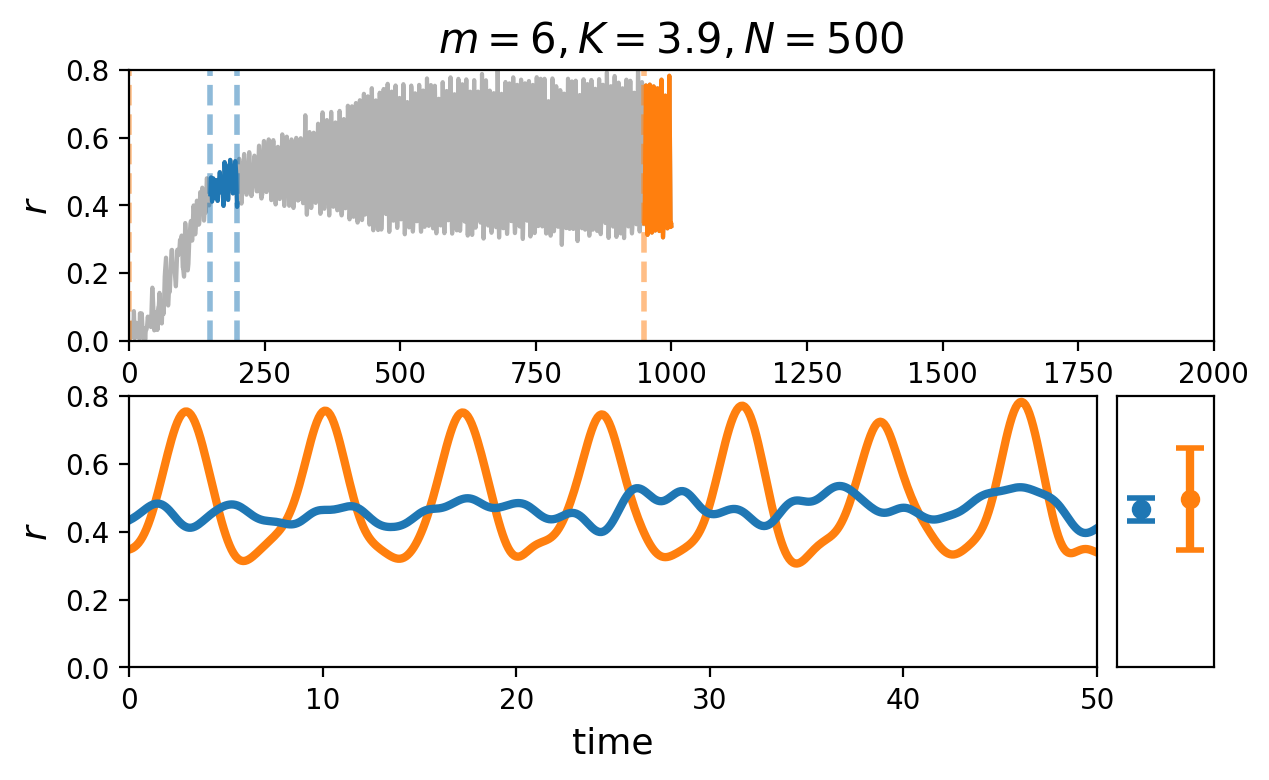

In [37]:
fig = plt.figure(figsize=(7,6))
# fig, (ax1,ax2) = plt.subplots(2,1,figsize=(7,5))
ax1 = fig.add_subplot(311)
plt.sca(ax1)
plt.plot(t,rs,color ='k',alpha=0.3)
plt.plot(t[-500:],rs[-500:],color = 'tab:orange')
plt.plot(t[1500:2000],rs[1500:2000],color = 'tab:blue')
plt.axvline(t[1500],0,1,color = 'tab:blue',alpha=0.5,lw=2,ls='--')
plt.axvline(t[2000],0,1,color = 'tab:blue',alpha=0.5,lw=2,ls='--')

plt.axvline(t[-500],0,1,color = 'tab:orange',alpha=0.5,lw=2,ls='--')
plt.axvline(t[0],0,1,color = 'tab:orange',alpha=0.5,lw=2,ls='--')
plt.ylim(0,0.8)
plt.xlim(0,2000)

plt.ylabel(r'$r$',fontsize=13)
ax1.set_xlabel(r'time',fontsize=13)
plt.title(r'$m=6,K=3.9,N=500$',fontsize=15)

ax2 = fig.add_subplot(312)
plt.sca(ax2)
plt.ylabel(r'$r$',fontsize=13)
plt.xlabel(r'time',fontsize=13)

plt.xlim(0,50)
plt.plot(t[0:500],rs[-500:],color = 'tab:orange',lw=3)
plt.plot(t[0:500],rs[1500:2000],color = 'tab:blue',lw=3)

plt.ylim(0,0.8)


div = make_axes_locatable(ax2)
cax = div.append_axes("right", size="10%", pad=0.1)
plt.sca(cax)

mean_r = np.mean(rs[-500:])
std_r = np.std(rs[-500:])


mean_r2 = np.mean(rs[1500:2000])
std_r2 = np.std(rs[1500:2000])
plt.setp(ax2.get_yticklabels(), visible=True)
plt.errorbar(0.1,mean_r,std_r,capsize=5,capthick=2,lw=3,fmt ='o',color='tab:orange')
plt.errorbar(-0.1,mean_r2,std_r2,capsize=5,capthick=2,lw=3,fmt ='o',color='tab:blue',zorder=3)
cax.set_ylim(0,0.8)
cax.set_xlim(-0.2,0.2)
cax.set_yticks([])
cax.set_xticks([])
# cax.set_title(r'$\bar{r}$ & $r(t)$ std.')


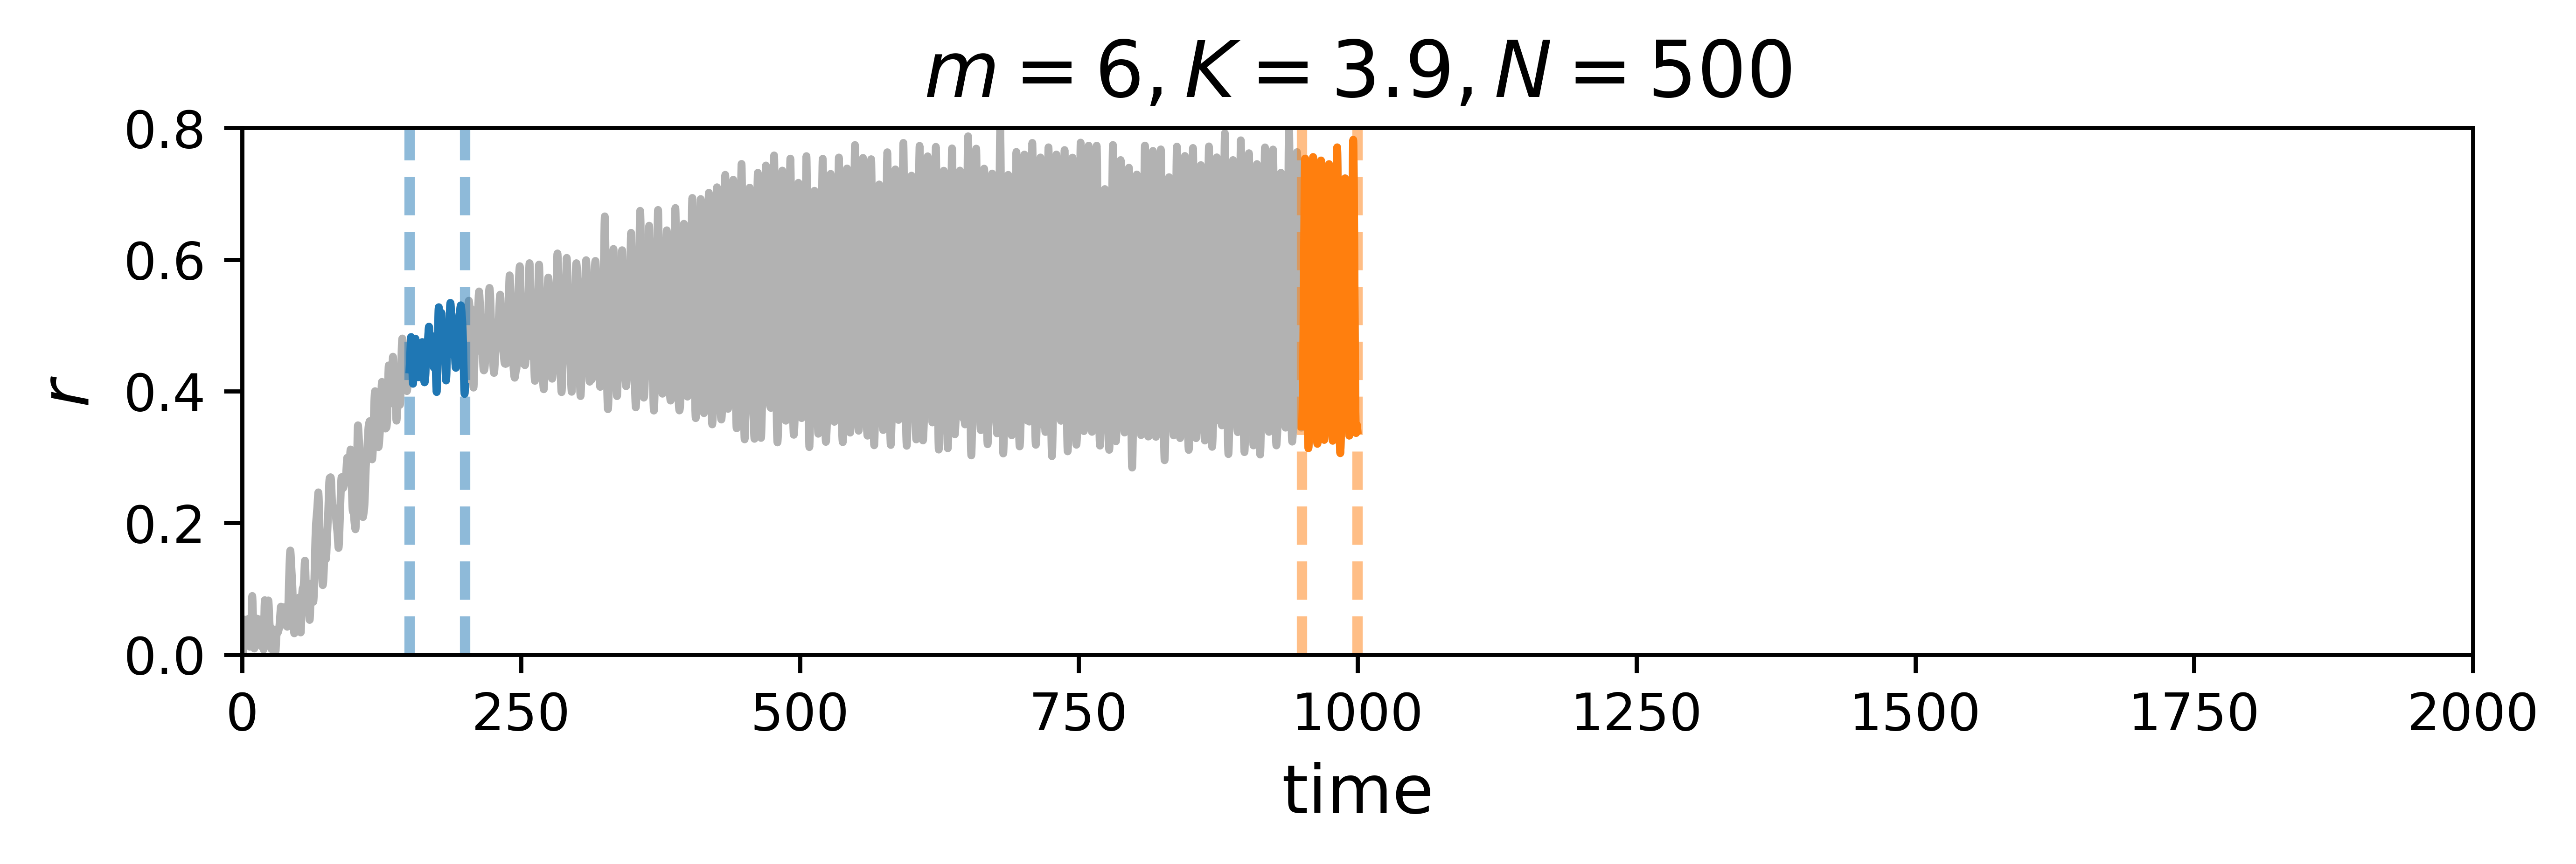

In [38]:
fig = plt.figure(figsize=(7,6),dpi=400)

ax1 = fig.add_subplot(311)
plt.sca(ax1)
plt.plot(t,rs,color ='k',alpha=0.3)
plt.plot(t[-500:],rs[-500:],color = 'tab:orange')
plt.plot(t[1500:2000],rs[1500:2000],color = 'tab:blue')
plt.axvline(t[1500],0,1,color = 'tab:blue',alpha=0.5,lw=2,ls='--')
plt.axvline(t[2000],0,1,color = 'tab:blue',alpha=0.5,lw=2,ls='--')

plt.axvline(t[-500],0,1,color = 'tab:orange',alpha=0.5,lw=2,ls='--')
plt.axvline(t[-1],0,1,color = 'tab:orange',alpha=0.5,lw=2,ls='--')
plt.ylim(0,0.8)
plt.xlim(0,2000)

plt.ylabel(r'$r$',fontsize=13)
plt.xlabel(r'time',fontsize=13)
plt.title(r'$m=6,K=3.9,N=500$',fontsize=15)
plt.tight_layout()

[]

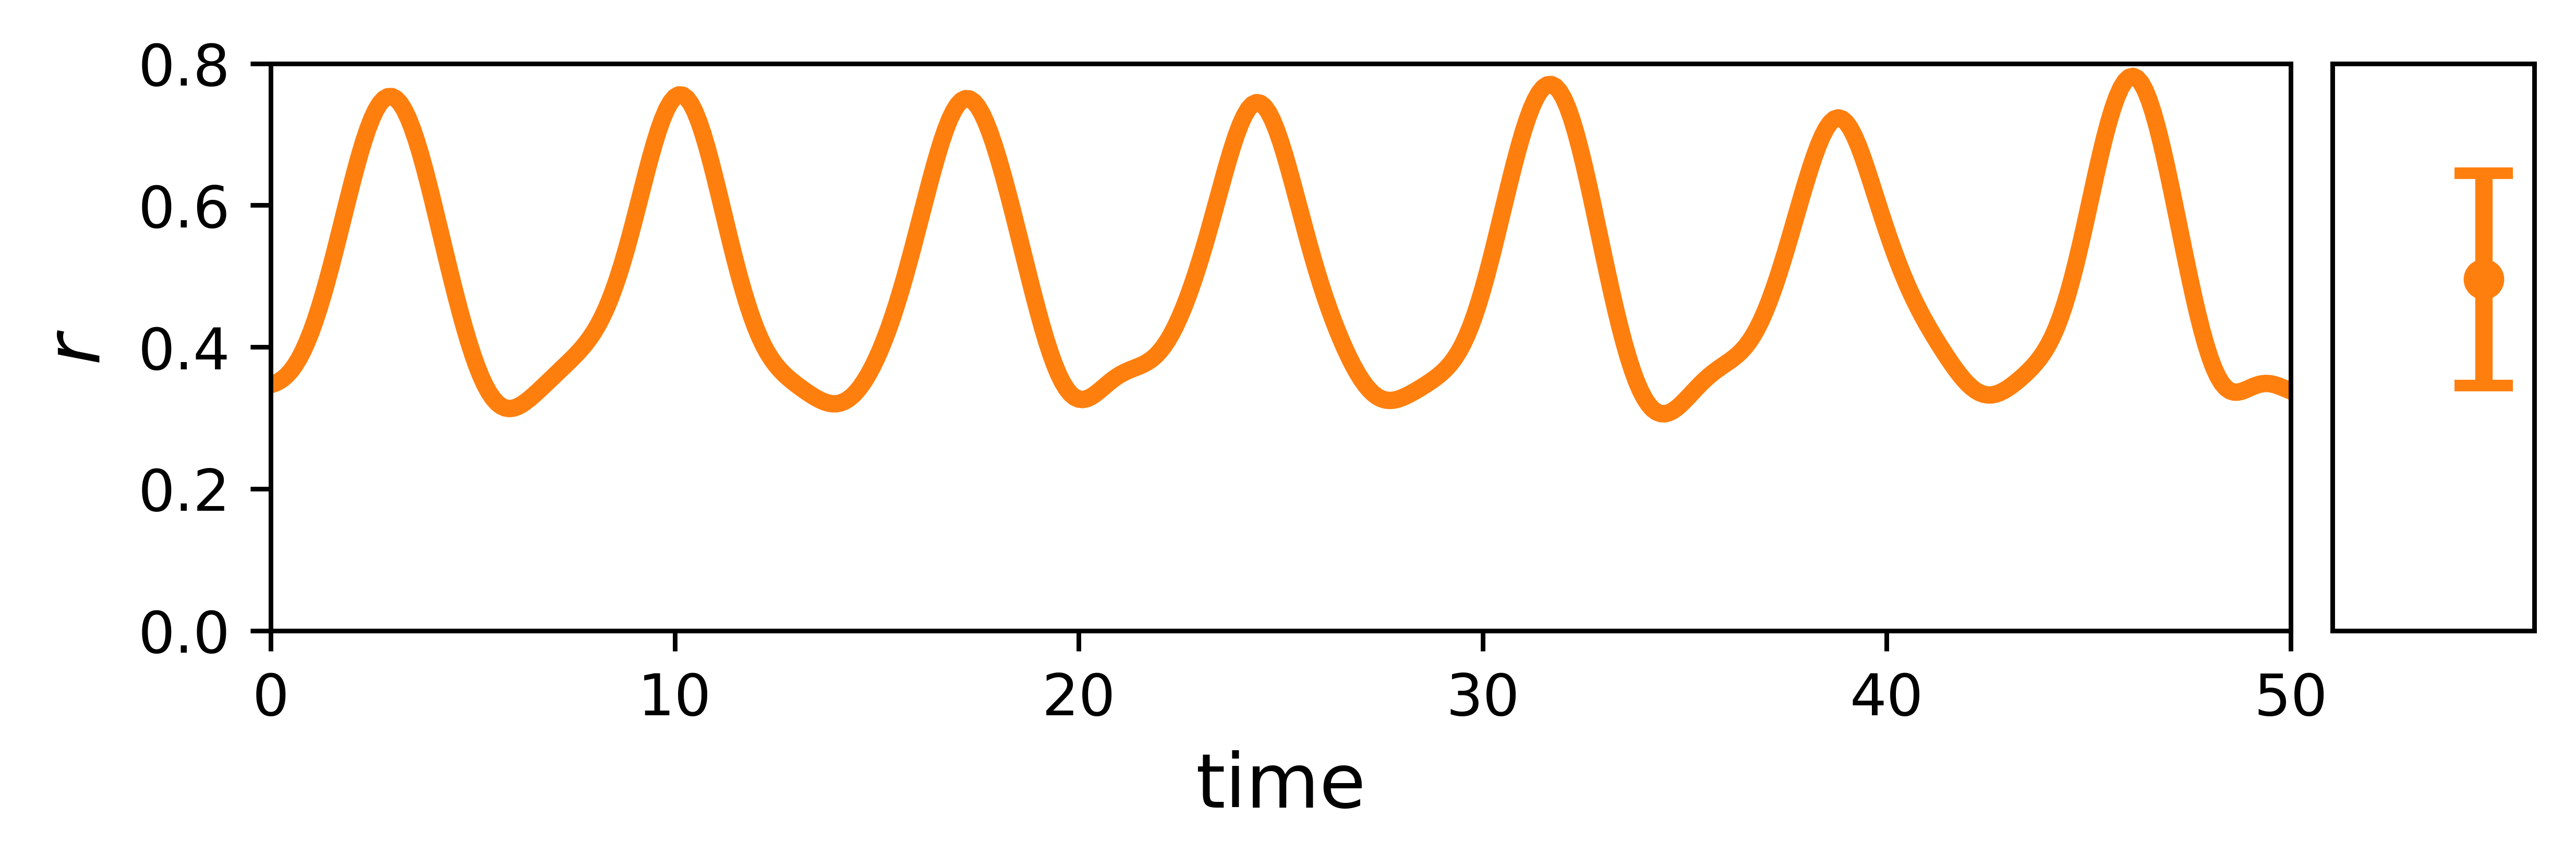

In [39]:
fig = plt.figure(figsize=(7,6),dpi=400)
# fig, (ax1,ax2) = plt.subplots(2,1,figsize=(7,5))
ax2 = fig.add_subplot(311)
plt.sca(ax2)
plt.ylabel(r'$r$',fontsize=13)
plt.xlabel(r'time',fontsize=13)

plt.xlim(0,50)
plt.plot(t[0:500],rs[-500:],color = 'tab:orange',lw=3)
# plt.plot(t[0:500],rs[1500:2000],color = 'tab:blue',lw=3)

plt.ylim(0,0.8)


div = make_axes_locatable(ax2)
cax = div.append_axes("right", size="10%", pad=0.1)
plt.sca(cax)

mean_r = np.mean(rs[-500:])
std_r = np.std(rs[-500:])


mean_r2 = np.mean(rs[1500:2000])
std_r2 = np.std(rs[1500:2000])
plt.setp(ax2.get_yticklabels(), visible=True)
# plt.errorbar(-0.1,mean_r2,std_r2,capsize=5,capthick=2,lw=3,fmt ='o',color='tab:blue',zorder=3)
plt.errorbar(0.1,mean_r,std_r,capsize=5,capthick=2,lw=3,fmt ='o',color='tab:orange')
cax.set_ylim(0,0.8)
cax.set_xlim(-0.2,0.2)
cax.set_yticks([])
cax.set_xticks([])
# cax.set_title(r'$\bar{r}$ & $r(t)$ std.')
# plt.tight_layout()


In [40]:
avg_dtheta

array([[-3.23491444, -3.01117639, -2.42400655, ...,  2.42815889,
         2.44084094,  2.64945574],
       [-3.23491395, -3.01113349, -2.42395351, ...,  2.42813391,
         2.44091456,  2.64945761],
       [-3.23490057, -3.01108794, -2.42390192, ...,  2.42809684,
         2.44099268,  2.64944552],
       ...,
       [-3.23430045, -3.00907352, -2.42378287, ...,  2.42764323,
         2.42743287,  2.64590436],
       [-3.23423519, -3.00909117, -2.42368147, ...,  2.42757616,
         2.4273164 ,  2.64587461],
       [-3.23413146, -3.00911112, -2.42354517, ...,  2.42746537,
         2.42716252,  2.64584017]])

In [41]:
CS,CMP,cluster,omega_s,omega_e,CMO,Is_group,C_s,C_e = cluster_os_new2(AVG=avg_dtheta[-500:],check=1e-4,c_size=5,N=N,omega=omega)
dtype = [('cluster size', int), ('cluster mean phase velocity', float)]
dtype2 = [('cluster size', int), ('cluster mean natural frequency', float)]
CSMP = np.array([(S,P) for S,P in zip(CS,CMP)],dtype=dtype)
CSMO = np.array([(S,O) for S,O in zip(CS,CMO)],dtype=dtype2)

In [21]:
CSMP

array([(283,  0.06623343), ( 70, -0.80948495), ( 56,  0.94315072)],
      dtype=[('cluster size', '<i8'), ('cluster mean phase velocity', '<f8')])

In [42]:
import matplotlib.colors as mcl


In [43]:
c0 = cluster[0]
c1 = cluster[1]
c2 = cluster[2]

In [44]:
CLU = np.concatenate([c0,c1,c2])
not_CLU = np.setdiff1d(np.arange(N),CLU)


In [45]:
rpsi = 1/N * np.sum(np.exp(1j*theta),axis=1)
rs = np.abs(rpsi)
psi = np.angle(rpsi)
n_dtheta = dtheta / np.max(abs(dtheta))
def time_oscillator(i):
    norm = n_dtheta[i]
    A = (1 + (norm)/2)
    theta_ = theta[i] - psi[i]
    sin,cos = A*np.sin(theta_+np.pi/2), A*np.cos(theta_+np.pi/2)
    
    return cos,sin,norm,np.cos(theta_+np.pi/2),np.sin(theta_+np.pi/2)

In [46]:
c_ = np.linspace(-np.pi,np.pi,1000)
circle = {
    'x': np.cos(c_),'y':np.sin(c_)
}

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_81766/1071560760.py:52: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_81766/1071560760.py:53: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=col

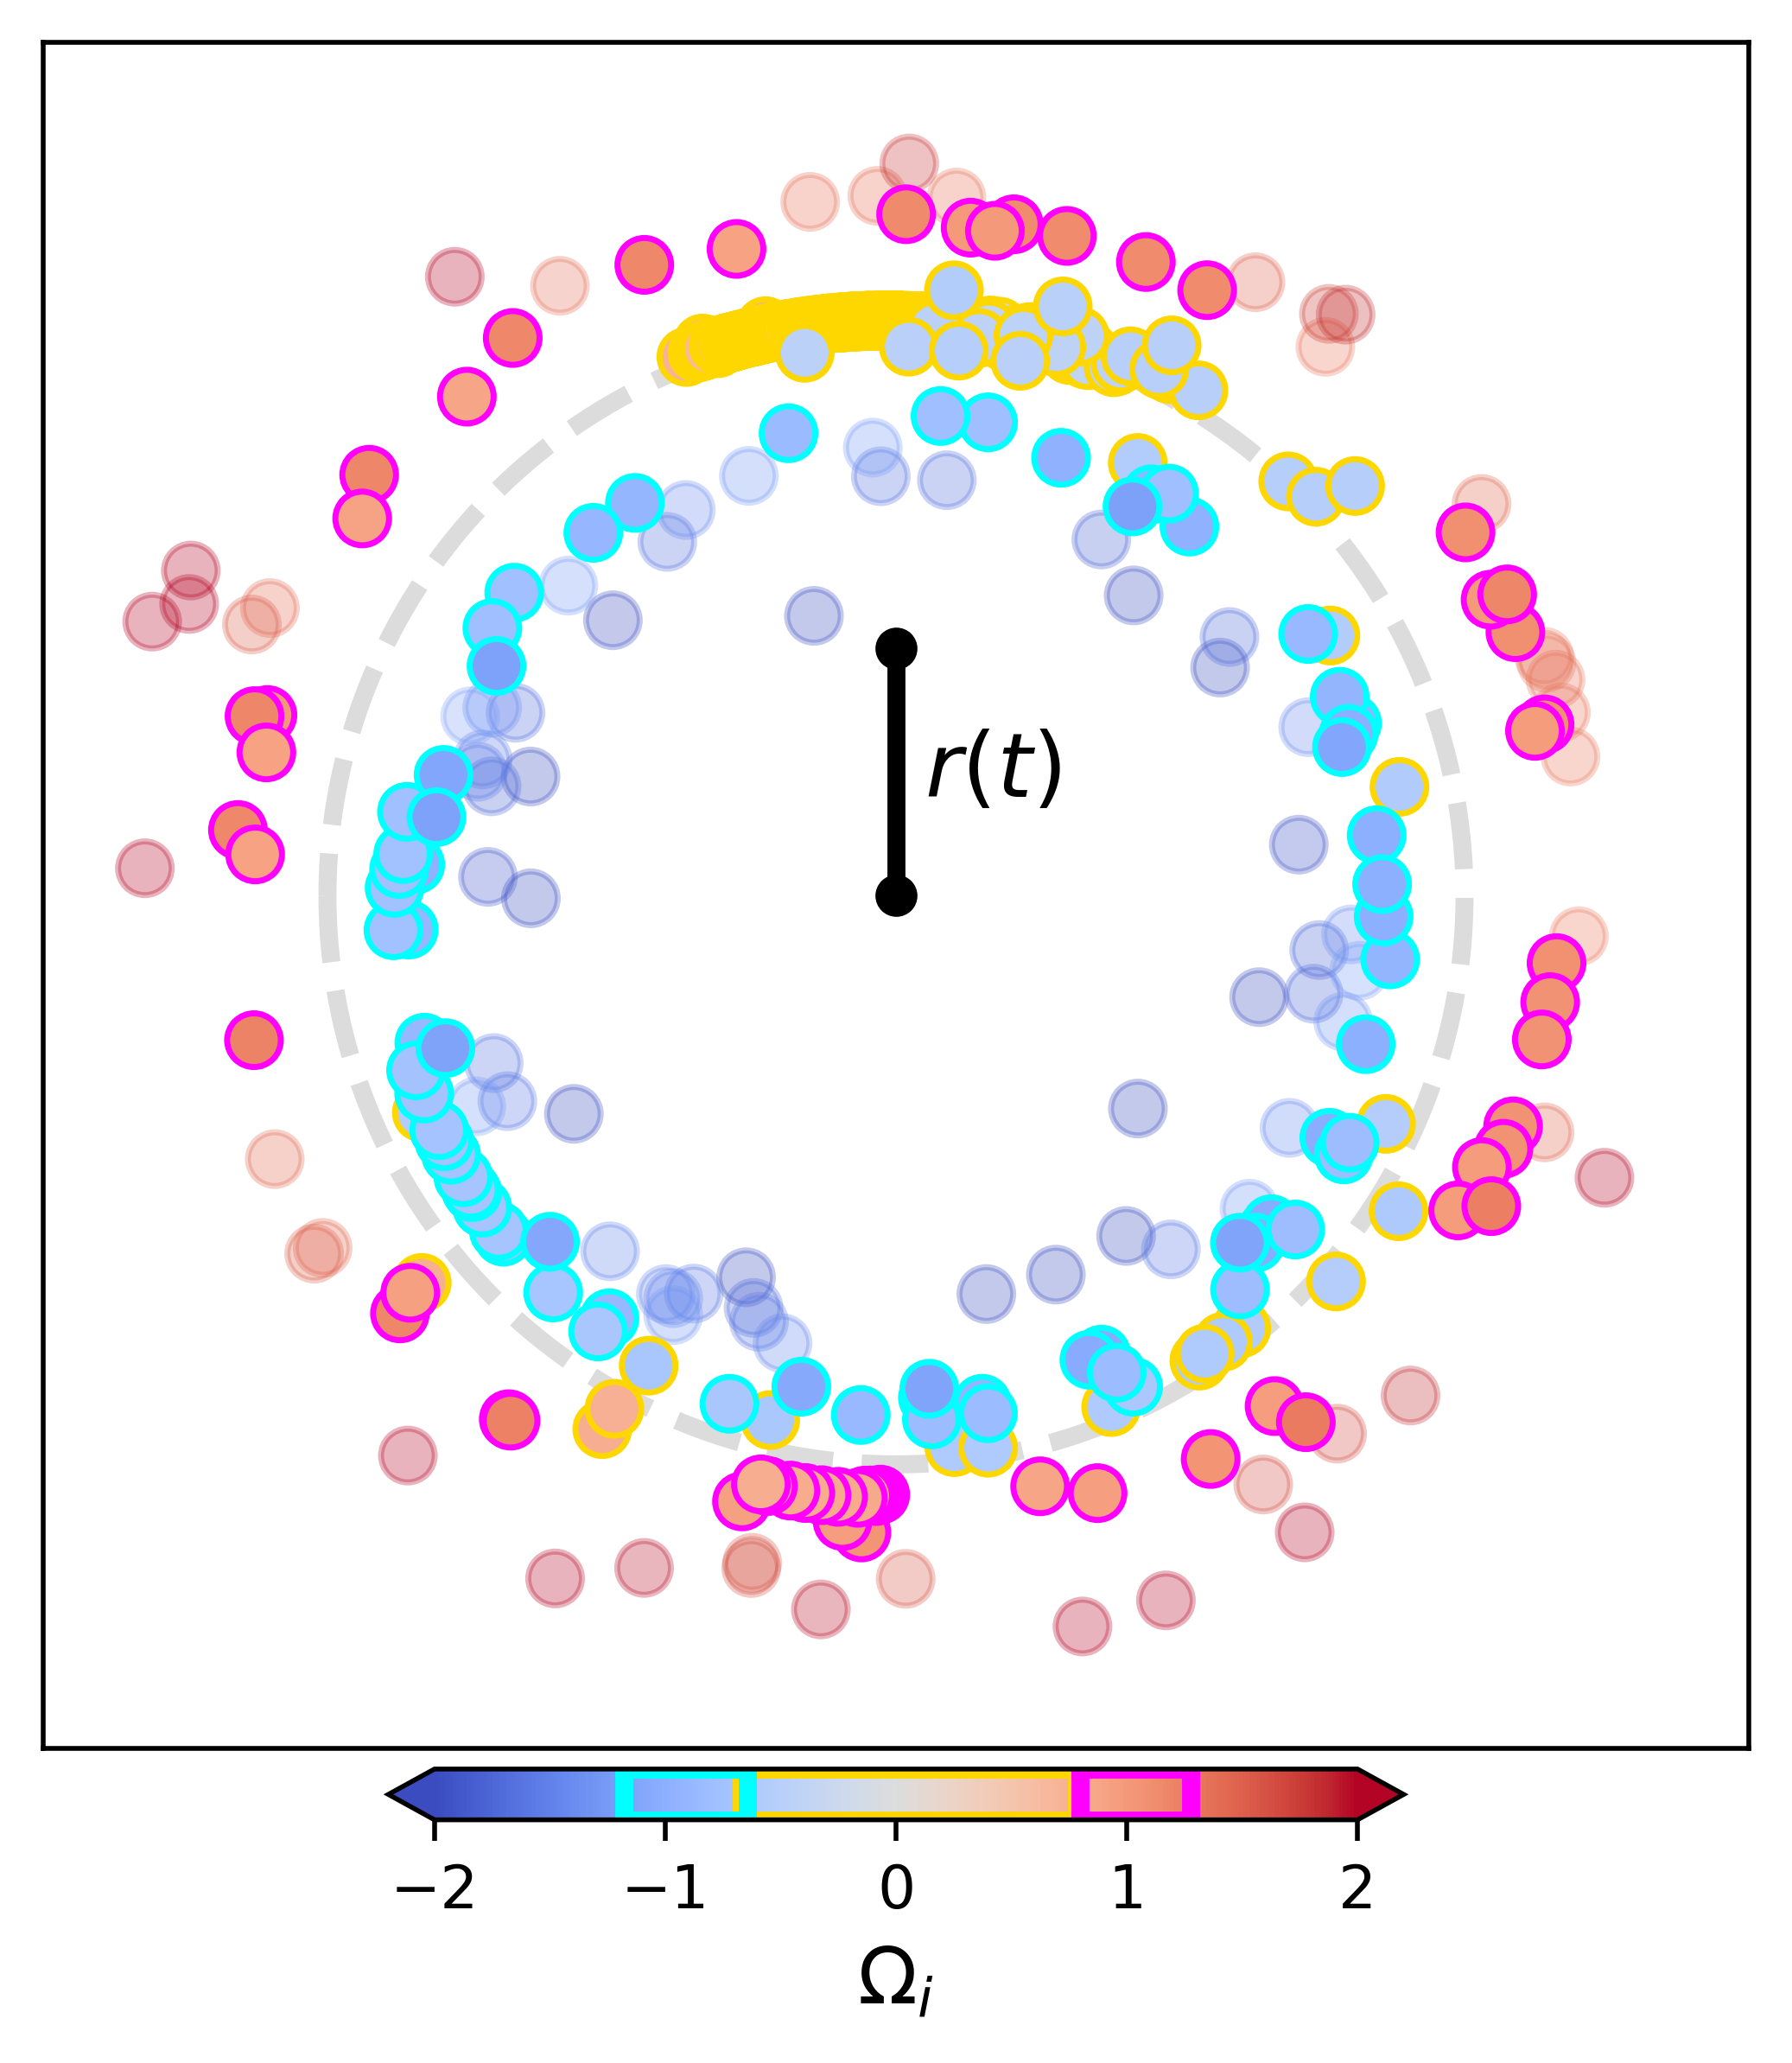

In [27]:
i = 1500
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5),dpi=500,facecolor=(1,1,1,0))

# colors = ['gold','darkslateblue','darkred']
colors = ['gold','aqua','fuchsia']

X,Y,C_,x,y = time_oscillator(i)
ax.plot([0,np.mean(x)],[0,np.mean(y)],color='black',lw=3,marker='o',zorder=3)
ax.text(np.mean(x)/2,np.mean(y)/2,' '+r'$r(t)$',horizontalalignment='left', verticalalignment='center',fontsize=15)
cmap = 'coolwarm'#'Spectral'#'viridis'#
s = 100
data = {
    'x': X[not_CLU],'y':Y[not_CLU],
    'c': omega[not_CLU],'s':80,'vmax':2,'vmin':-2,'alpha':0.3,
    'cmap':cmap,
    # 'c': colors,#ome"ga,'cmap':'YlOrRd',
}
cax_ = ax.scatter(**data,zorder=1)
alpha = 1
alpha_text = f'{round(alpha*255):02x}'
for clu,color in zip([c0,c1,c2],colors):
    if len(clu)!=0:
        data = {
            'x': X[clu],'y':Y[clu],
            'c': omega[clu],'cmap':cmap,
            'edgecolor':(*mcl.to_rgb(color),alpha),'linewidth':1,'s':80,'vmax':2,'vmin':-2}
        cax = ax.scatter(**data,zorder=1)


ax.plot(np.cos(c_),np.sin(c_),zorder=0,color=plt.cm.coolwarm(0.5),lw=3,ls='--')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
# ax.axis('off')

ax.set_xticks([])
ax.set_yticks([])
# ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
plt.tight_layout()
# ax = plt.gca()
plt.gca().set_aspect('equal')
cbar = plt.colorbar(cax,extend='both',shrink = 0.5,orientation='horizontal',location='bottom',pad=0.01)
# cbar.ax.plot([0,1],[1]*2,'w')
# for clu,color in zip([c0,c1,c2],colors):
for clu,color in zip([c0,c1,c2],colors):

    if len(clu)!=0:
        min_c,max_c = np.max(omega[clu]),np.min(omega[clu])
        cbar.ax.plot([min_c]*2,[0,1],color=color,lw=3)
        cbar.ax.plot([max_c]*2,[0,1],color=color,lw=3)
        cbar.ax.plot([min_c,max_c],[0,0],color=color,lw=3)
        cbar.ax.plot([min_c,max_c],[1,1],color=color,lw=3)
p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=colors[1])
p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])
# p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])
# ax.legend([p0,p1,p2],['main cluster',r'secondary cluster $(-)$',r'secondary cluster $(+)$'],loc='lower center', bbox_to_anchor=(0.5, -0.353))
# ax.text(1.4,1.4,r'$t=t_i$',horizontalalignment='right', verticalalignment='top',fontsize=15)

cbar.set_label('$\Omega_i$',rotation=0,fontsize=13)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

# plt.colorbar(cax)
# plt.savefig(f'./DATA_FILE/oscillator_N{N},r_{r[i]}.jpg',dpi=800, transparent=True)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_81766/697512277.py:90: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_81766/697512277.py:91: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=color

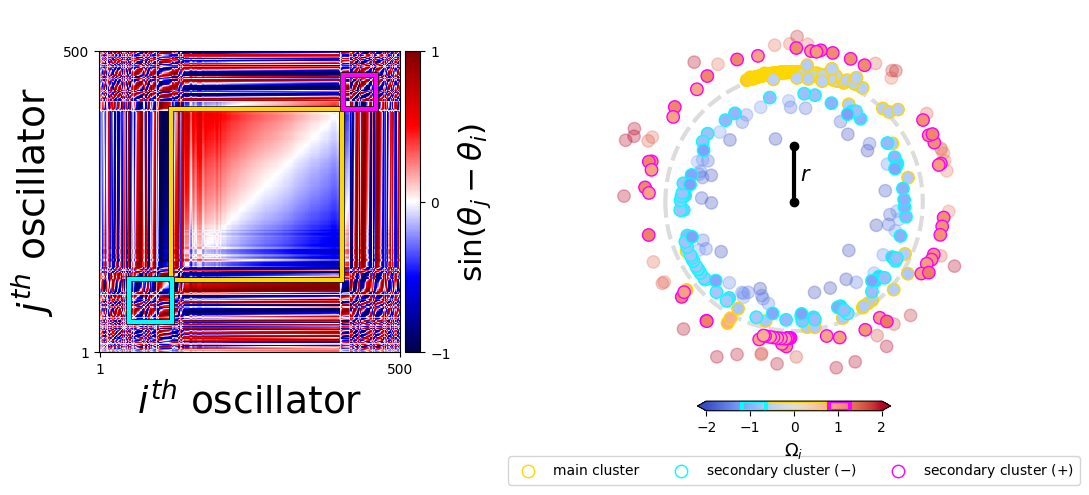

In [29]:
from itertools import combinations,permutations
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, (ax_sin, ax) = plt.subplots(ncols=2, nrows=1, figsize=(11, 6),dpi=100,facecolor=(1,1,1,0),width_ratios=[5,6])
multi_ = 1.5



i = 1500
index = i
s = 800
cmap = 'bwr'
# colors = ['gold','darkslateblue','darkred']
# colors = ['gold','aqua','fuchsia']
colors = ['gold','aqua','fuchsia','lawngreen','orangered']

RECs = []
plt.sca(ax_sin)
I,J = np.meshgrid(theta[i],theta[i])
im = plt.imshow(np.sin(J-I),vmin=-1,vmax=1,cmap = 'seismic',origin='lower',)
plt.xticks([1,500])
plt.yticks([1,500])
plt.xlabel(r'$i^{th}$ oscillator',fontsize=18*multi_)
plt.ylabel(r'$j^{th}$ oscillator',fontsize=18*multi_)

for clu,color in zip([c0,c1,c2],colors):
    if len(clu)!=0:

        min_c,max_c = np.max(clu),np.min(clu)
        Rec_ = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor='k', linewidth=4)
        Rec = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor=color, linewidth=3)
        RECs.append((Rec_,Rec))
        plt.gca().add_patch(Rec_)
        plt.gca().add_patch(Rec)
# plt.title(f'K = {Ks[K_idx]}',fontsize=18*multi_)
div = make_axes_locatable(ax_sin)
cax = div.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_ticks([-1,0,1])
cbar.set_label(r'$\sin(\theta_j-\theta_i)$',fontsize=15*multi_)
############################ rotator graph ####################

plt.sca(ax)
# colors = ['gold','darkslateblue','darkred']
X,Y,C_,x,y = time_oscillator(i)
ax.plot([0,np.mean(x)],[0,np.mean(y)],color='black',lw=3,marker='o',zorder=3)
ax.text(np.mean(x)/2,np.mean(y)/2,' '+r'$r$',horizontalalignment='left', verticalalignment='center',fontsize=15)
cmap = 'coolwarm'#'Spectral'#'viridis'#
s = 100
data = {
    'x': X[not_CLU],'y':Y[not_CLU],
    'c': omega[not_CLU],'s':80,'vmax':2,'vmin':-2,'alpha':0.3,
    'cmap':cmap,
    # 'c': colors,#omega,'cmap':'YlOrRd',
}
cax_ = ax.scatter(**data,zorder=1)
alpha = 1
alpha_text = f'{round(alpha*255):02x}'
for clu,color in zip([c0,c1,c2],colors):
    if len(clu)!=0:

        data = {
            'x': X[clu],'y':Y[clu],
            'c': omega[clu],'cmap':cmap,
            'edgecolor':(*mcl.to_rgb(color),alpha),'linewidth':1,'s':80,'vmax':2,'vmin':-2}
        cax = ax.scatter(**data,zorder=1)


ax.plot(np.cos(c_),np.sin(c_),zorder=0,color=plt.cm.coolwarm(0.5),lw=3,ls='--')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
# ax.axis('off')

ax.set_xticks([])
ax.set_yticks([])
# ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
plt.tight_layout()
# ax = plt.gca()
ax.set_aspect('equal')
cbar = plt.colorbar(cax,extend='both',shrink = 0.5,orientation='horizontal',location='bottom',pad=0.01)
# cbar.ax.plot([0,1],[1]*2,'w')
for clu,color in zip([c0,c1,c2],colors):
    if len(clu)!=0:

        min_c,max_c = np.max(omega[clu]),np.min(omega[clu])
        cbar.ax.plot([min_c]*2,[0,1],color=color,lw=3)
        cbar.ax.plot([max_c]*2,[0,1],color=color,lw=3)
        cbar.ax.plot([min_c,max_c],[0,0],color=color,lw=3)
        cbar.ax.plot([min_c,max_c],[1,1],color=color,lw=3)
p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=colors[1])
p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])
ax.legend([p0,p1,p2],['main cluster',r'secondary cluster $(-)$',r'secondary cluster $(+)$'],loc='lower center', bbox_to_anchor=(0.5, -0.25),ncols=3)
# ax.text(1.4,1.4,r'$t=t_i$',horizontalalignment='right', verticalalignment='top',fontsize=15)

cbar.set_label('$\Omega_i$',rotation=0,fontsize=13)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.axis('off')
ax.set_facecolor((1,1,1,0))
ax.set_aspect('equal')
for _ in range(100):fig.tight_layout()


# ax = plt.gca()

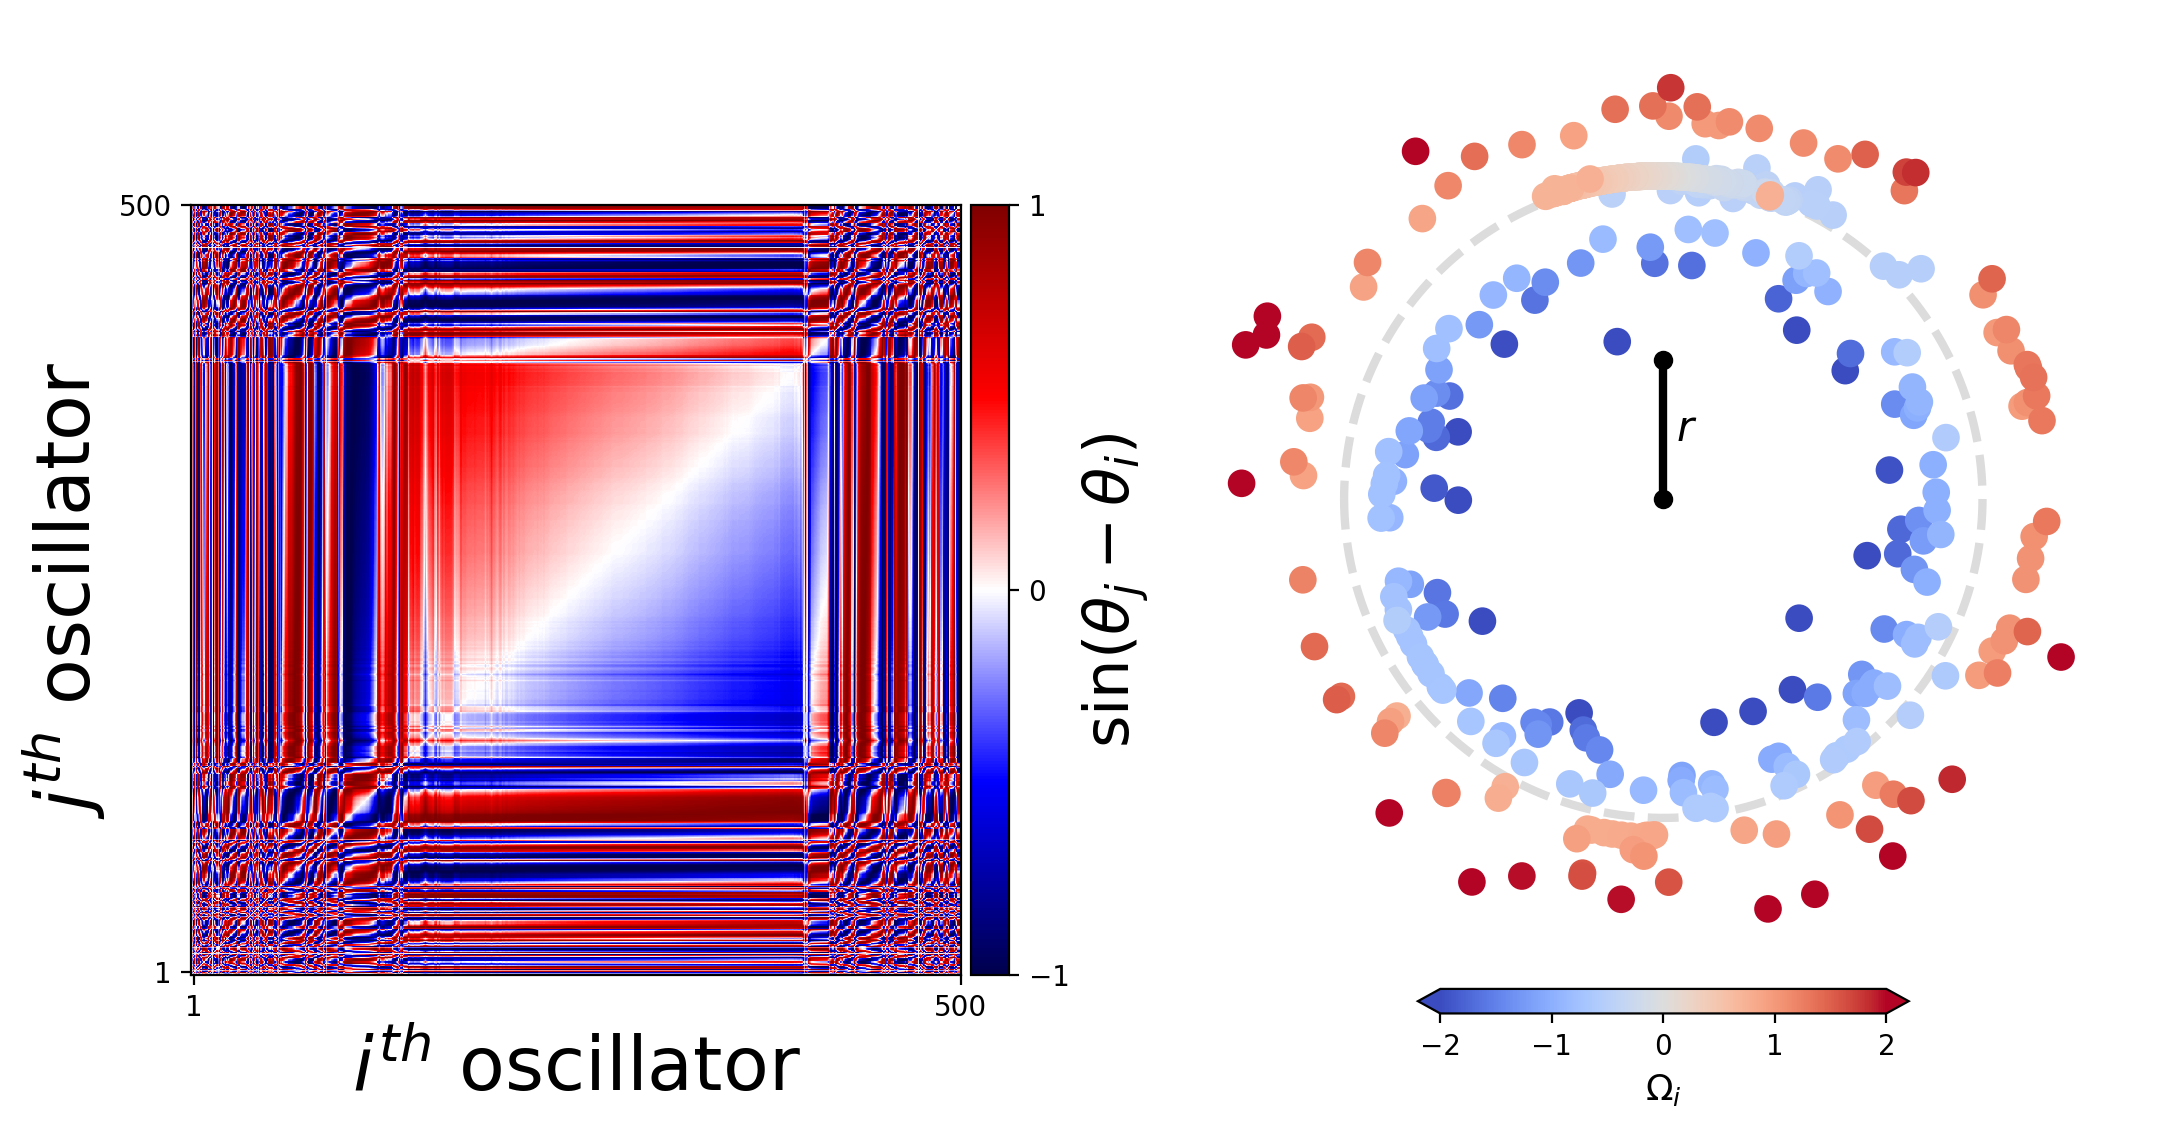

In [48]:
from itertools import combinations,permutations
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, (ax_sin, ax) = plt.subplots(ncols=2, nrows=1, figsize=(11, 6),dpi=100,facecolor=(1,1,1,0),width_ratios=[5,6])
multi_ = 1.5



i = 1500
index = i
s = 800
cmap = 'bwr'
# colors = ['gold','darkslateblue','darkred']
# colors = ['gold','aqua','fuchsia']
colors = ['gold','aqua','fuchsia','lawngreen','orangered']

RECs = []
plt.sca(ax_sin)
I,J = np.meshgrid(theta[i],theta[i])
im = plt.imshow(np.sin(J-I),vmin=-1,vmax=1,cmap = 'seismic',origin='lower',)
plt.xticks([1,500])
plt.yticks([1,500])
plt.xlabel(r'$i^{th}$ oscillator',fontsize=18*multi_)
plt.ylabel(r'$j^{th}$ oscillator',fontsize=18*multi_)

# for clu,color in zip([c0,c1,c2],colors):
#     if len(clu)!=0:

#         min_c,max_c = np.max(clu),np.min(clu)
#         Rec_ = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor='k', linewidth=4)
#         Rec = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor=color, linewidth=3)
#         RECs.append((Rec_,Rec))
#         plt.gca().add_patch(Rec_)
#         plt.gca().add_patch(Rec)
# plt.title(f'K = {Ks[K_idx]}',fontsize=18*multi_)
div = make_axes_locatable(ax_sin)
cax = div.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_ticks([-1,0,1])
cbar.set_label(r'$\sin(\theta_j-\theta_i)$',fontsize=15*multi_)
############################ rotator graph ####################

plt.sca(ax)
# colors = ['gold','darkslateblue','darkred']
X,Y,C_,x,y = time_oscillator(i)
ax.plot([0,np.mean(x)],[0,np.mean(y)],color='black',lw=3,marker='o',zorder=3)
ax.text(np.mean(x)/2,np.mean(y)/2,' '+r'$r$',horizontalalignment='left', verticalalignment='center',fontsize=15)
cmap = 'coolwarm'#'Spectral'#'viridis'#
s = 100
data = {
    'x': X,'y':Y,
    'c': omega,'s':80,'vmax':2,'vmin':-2,'alpha':1,
    'cmap':cmap,
    # 'c': colors,#omega,'cmap':'YlOrRd',
}
cax_ = ax.scatter(**data,zorder=1)
alpha = 1
alpha_text = f'{round(alpha*255):02x}'
# for clu,color in zip([c0,c1,c2],colors):
#     if len(clu)!=0:

#         data = {
#             'x': X[clu],'y':Y[clu],
#             'c': omega[clu],'cmap':cmap,
#             'edgecolor':(*mcl.to_rgb(color),alpha),'linewidth':1,'s':80,'vmax':2,'vmin':-2}
#         cax = ax.scatter(**data,zorder=1)


ax.plot(np.cos(c_),np.sin(c_),zorder=0,color=plt.cm.coolwarm(0.5),lw=3,ls='--')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
# ax.axis('off')

ax.set_xticks([])
ax.set_yticks([])
# ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
plt.tight_layout()
# ax = plt.gca()
ax.set_aspect('equal')
cbar = plt.colorbar(cax_,extend='both',shrink = 0.5,orientation='horizontal',location='bottom',pad=0.01)
# cbar.ax.plot([0,1],[1]*2,'w')
# for clu,color in zip([c0,c1,c2],colors):
#     if len(clu)!=0:

#         min_c,max_c = np.max(omega[clu]),np.min(omega[clu])
#         cbar.ax.plot([min_c]*2,[0,1],color=color,lw=3)
#         cbar.ax.plot([max_c]*2,[0,1],color=color,lw=3)
#         cbar.ax.plot([min_c,max_c],[0,0],color=color,lw=3)
#         cbar.ax.plot([min_c,max_c],[1,1],color=color,lw=3)
# p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
# p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=colors[1])
# p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])
# ax.legend([p0,p1,p2],['main cluster',r'secondary cluster $(-)$',r'secondary cluster $(+)$'],loc='lower center', bbox_to_anchor=(0.5, -0.25),ncols=3)
# ax.text(1.4,1.4,r'$t=t_i$',horizontalalignment='right', verticalalignment='top',fontsize=15)

cbar.set_label('$\Omega_i$',rotation=0,fontsize=13)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.axis('off')
ax.set_facecolor((1,1,1,0))
ax.set_aspect('equal')
for _ in range(100):fig.tight_layout()


# ax = plt.gca()

In [54]:
fig.set_facecolor('white')
def ANI2(A_idx):
    i = A_idx
    index = i
    s = 800
    cmap = 'bwr'
    # colors = ['gold','darkslateblue','darkred']
    colors = ['gold','aqua','fuchsia']

    RECs = []
    ax_sin.clear()
    # plt.sca(ax_sin)
    I,J = np.meshgrid(theta[i],theta[i])
    im = ax_sin.imshow(np.sin(J-I),vmin=-1,vmax=1,cmap = 'seismic',origin='lower',)
    ax_sin.set_xticks([1,500])
    ax_sin.set_yticks([1,500])
    ax_sin.set_xlabel(r'$i^{th}$ oscillator',fontsize=18*multi_)
    ax_sin.set_ylabel(r'$j^{th}$ oscillator',fontsize=18*multi_)

    # for clu,color in zip([c0,c1,c2],colors):
    # for clu,color in zip([c0,c1,c2],colors):

    #     if len(clu)!=0:
    #         min_c,max_c = np.max(clu),np.min(clu)
    #         Rec_ = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor='k', linewidth=3)
    #         Rec = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor=color, linewidth=2)
    #         RECs.append((Rec_,Rec))
    #         ax_sin.add_patch(Rec_)
    #         ax_sin.add_patch(Rec)
    ############################ rotator graph ####################
    ax.clear()

    # colors = ['gold','darkslateblue','darkred']
    X,Y,C_,x,y = time_oscillator(i)
    ax.plot([0,np.mean(x)],[0,np.mean(y)],color='black',lw=3,marker='o',zorder=3)
    ax.text(np.mean(x)/2,np.mean(y)/2,' '+r'$r$',horizontalalignment='left', verticalalignment='center',fontsize=15)
    cmap = 'coolwarm'#'Spectral'#'viridis'#
    s = 100
    data = {
        'x': X,'y':Y,
        'c': omega,'s':80,'vmax':2,'vmin':-2,'alpha':1,
        'cmap':cmap,
        # 'c': colors,#omega,'cmap':'YlOrRd',
    }
    cax_ = ax.scatter(**data,zorder=1)
    alpha = 1
    alpha_text = f'{round(alpha*255):02x}'
    

    ax.plot(np.cos(c_),np.sin(c_),zorder=0,color=plt.cm.coolwarm(0.5),lw=3,ls='--')
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    # ax.axis('off')

    ax.set_xticks([])
    ax.set_yticks([])
    # ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)

    # ax = plt.gca()
    ax.set_aspect('equal')
 
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.axis('off')
    ax.set_facecolor((1,1,1,0))
    ax.set_aspect('equal')
    fig.tight_layout()



In [50]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [51]:
idxs = np.arange(9500,10000,1)


In [55]:
idxs = np.arange(1500,2000,1)
%config InlineBackend.figure_format = 'retina'
ani = FuncAnimation(fig,ANI2,frames=idxs,interval=50)
# ani.save('Groups oscillation2.mp4',dpi=400)
ani.save(f'230823 화순/cluster formation m = {m}, K = 3.9 1500-2000_non BOX.mp4',dpi=400)
# HTML(ani.to_html5_video())

In [56]:
idxs = np.arange(9500,10000,1)
%config InlineBackend.figure_format = 'retina'
ani = FuncAnimation(fig,ANI2,frames=idxs,interval=50)
# ani.save('Groups oscillation2.mp4',dpi=400)
ani.save(f'230823 화순/cluster formation m = {m}, K = 3.9 9500-10000_non BOX.mp4',dpi=400)
# HTML(ani.to_html5_video())

## Lorentzian distribution

In [1]:
import numpy as np
import pandas as pd
from TO_sim.TLO import TLO,make_new_df
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0,dK_graph,Make_empirical_KR as KR,split_uo
from TO_sim.gen_Distribution import Normal,Quantile_Normal as Q_Normal,Lorentzian
from parmap import parmap
from parmap import starmap
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from scipy.signal import find_peaks
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0,dK_graph,Make_empirical_KR as KR,split_uo
from TO_sim.gen_Distribution import Normal,Quantile_Normal as Q_Normal,Lorentzian
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
import numpy as np
import pandas as pd
from TO_sim.get_cluster import cluster_os_new2
max_c = 3e-4

In [3]:
K_start = 0
m_start = 6
df_Km,theta_col,dtheta_col = make_new_df(K_start,m_start,N = 500)

In [4]:
seed = 10
N = 500
theta_init,omega,Kc = Lorentzian(N,0,1,seed=seed)
omega = np.sort(omega) - np.mean(omega)
ms = np.arange(0,13+0.05,0.1)
K = 0
m = 0
dK = 0.1
K_end = 15
Ks = np.arange(0,K_end+dK/2,dK)

df_Km,theta_col,dtheta_col = make_new_df(0,m,N = N)
df_Km = df_Km.reset_index()

In [5]:
df_sets = {}
df_15_sets = {}
df_full_sets = {}

In [49]:
ms = [0.95,2,6]
for m in tqdm(ms):
    df = TLO(m,theta_init=theta_init,dtheta_init = 0*omega,omega=omega,Ks=Ks,N=N,t_end=1000,dt = 0.1)
    df_sets[m] = df
    df_theta_col = df[theta_col]
    df_dtheta_col = df[dtheta_col]
    theta_15=df_theta_col.loc[(15,m)].to_numpy(dtype=float)
    dtheta_15 = df_dtheta_col.loc[(15,m)].to_numpy(dtype=float)
    df_15 = TLO(m,theta_init=theta_15,dtheta_init = dtheta_15,omega=omega,Ks=Ks[::-1],N=N,t_end=1000,dt = 0.1)
    df_15_sets[m] = df_15
    df_full = TLO(m,theta_init=np.zeros_like(theta_init),dtheta_init = np.zeros_like(theta_init),omega=omega,Ks=Ks[::-1],N=N,t_end=1000,dt = 0.1)
    df_full_sets[m] = df_full

  0%|          | 0/3 [00:00<?, ?it/s]

In [9]:
def to_mdf(df,m):
    ms = df.reset_index().m.unique()
    re_df = df.reset_index()

    df_m = re_df[re_df.m == m]
    Ks = df_m.K.to_numpy()
    df_m = df_m.set_index('K')
    return df_m,Ks
def to_maxomega(x):
    if type(x)!= float:
        cluster = omega[np.array(list(map(int,x.split(' '))))] 
        cluster -= np.mean(cluster)
        return np.max(abs(cluster))
    else: return np.nan

def KR_underK(set,K):
    Ks,Rs = set
    K_ = Ks[Ks<K] 
    R_ = Rs[Ks<K] 
    return (K_,R_)

O_p = lambda Kr,m: (4/np.pi)*np.sqrt(Kr/m)
def get_nearest_KR(R,F_new):
    F_K,F_R = F_new
    r_idx = np.searchsorted(F_R,R)
    return F_K[r_idx],F_R[r_idx]
def get_near_o(R,F_new,m):
    F_K,F_R = F_new
    r_idx = np.searchsorted(F_R,R)
    K_new,r_new = F_K[r_idx],F_R[r_idx]
    O = O_p(K_new*r_new,m)
    return O

In [10]:
backs_r = [df.loc[(15,6)].r]
backs_K = [15]

In [11]:
m_to_draw = 6

KF,RF,KB,RB= KR(m_to_draw,dist='Lorentzian')
F = KF,RF
B = KB,RB
F_new = dK_graph(F,0.05)
BU,BO = split_uo(*B)

In [137]:
df_6,Ks = df.quary
K_rs = df_6.r
O_p = lambda Kr,m: (4/np.pi)*np.sqrt(Kr/m)
O_ps = (K_rs*Ks).apply(O_p,m=m_to_draw)
O_ps_n = K_rs.apply(get_near_o,F_new=F_new,m=m_to_draw)

df_m_cluster,Ks = to_mdf(df_f_cluster,m_to_draw)
df_m_r,Ks = to_mdf(df,m_to_draw)
max_o = df_m_cluster['c0 list'].apply(to_maxomega)
plt.plot(Ks,max_o,label = r'cluster maximum omega')
plt.plot(Ks,O_ps,label = r'$\Omega_p(K,r) = \frac{4}{\pi}\sqrt{\frac{K\cdot r}{m}}$')
plt.plot(Ks,O_ps_n,label=r'$\Omega_p(r) = \frac{4}{\pi}\sqrt{\frac{K(r)\cdot r}{m}}$')
plt.legend()

NameError: name 'df_f_cluster' is not defined

In [139]:
D_sets_op_n = {}
U_sets_op_n = {}
for K in K_backs:
    O = O_ps_n.iloc[int(K*10)]
    O_ = max_o.loc[K]
    if ~np.isnan(O_):
        D,U = KR0(m_to_draw,O)
        D_sets_op_n[K] = D
        U_sets_op_n[K] = U

NameError: name 'max_o' is not defined

In [12]:
backs_r = [df.loc[(15,6)].r]
backs_K = [15]

In [13]:
D_sets_op_B = {}
U_sets_op_B = {}
for K,r in zip(backs_K,backs_r):
    O = get_near_o(r,F_new,m_to_draw)
    D,U = KR0(m_to_draw,O,dist = 'Lorentzian')
    D_sets_op_B[K] = D
    U_sets_op_B[K] = U


In [24]:
tab_color_list = ['tab:blue','tab:orange','tab:gray','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray']


In [15]:
K_backs= [15]

In [21]:
df = df_sets[m] = df
df_15 = df_15_sets[m] = df_15
df_full = df_full_sets[m] = df
df_15 = df_15.sort_index()
df_full = df_full.sort_index()

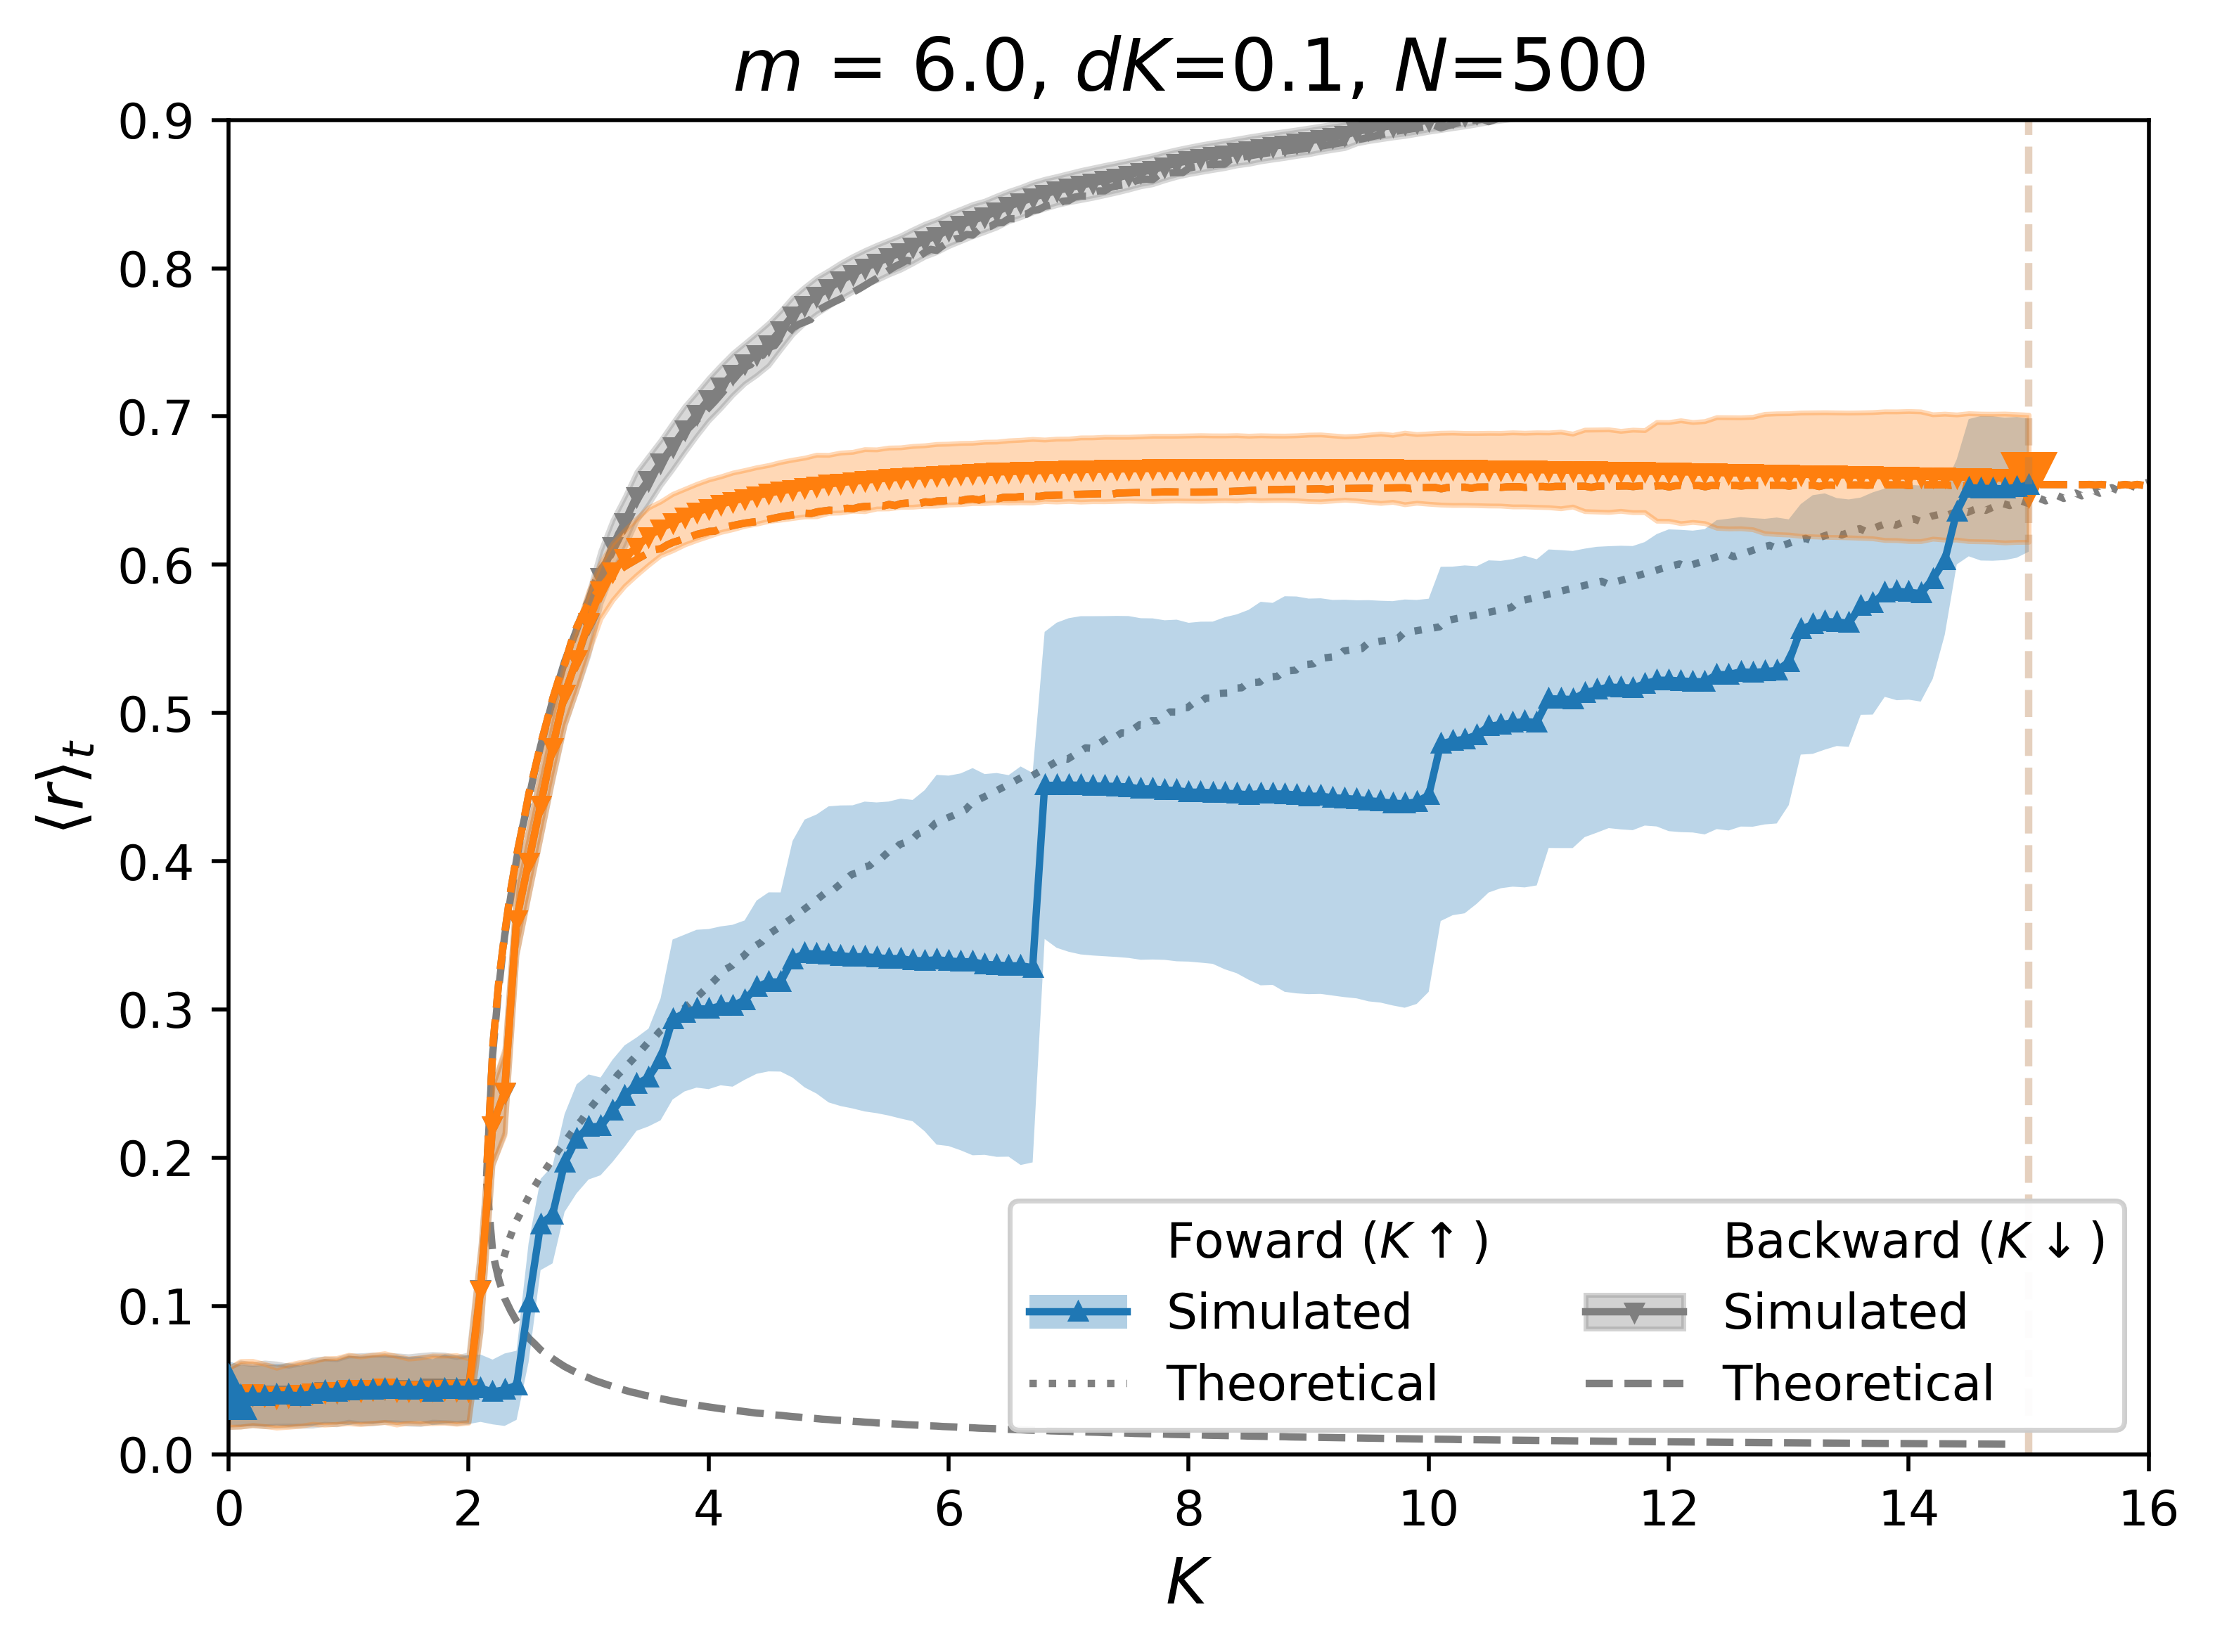

In [31]:
# plt.figure(figsize=(6,4.5),dpi=500)
plt.figure(dpi=500)
ms = df.reset_index().m.unique()
re_df = df.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy(dtype=float)
rs = df_m.r.to_numpy(dtype=float)
rstd = df_m.rstd.to_numpy(dtype=float)
rMM= df_m.rMM.to_numpy(dtype=float)

lf,= plt.plot(Ks,rs,'-',label=r'$K_{forward}$',color = 'tab:blue')
_,= plt.plot(Ks[0],rs[0],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=10,zorder=10)
mf,= plt.plot(Ks[:],rs[:],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=3)
ff = plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3)
plt.legend([(lf,ff)],[15],title=f'Backward')

backs_r = []
backs_K = []
num = 1
num_c = 1
B_legends = []
B_legends2 = ()
for K_back,df_b in zip([15,15],[df_15,df_full]):

    ms = df_b.reset_index().m.unique()
    re_df = df_b.reset_index()

    df_m = re_df[re_df.m == m_to_draw]
    Ks = df_m.K.to_numpy(dtype=float)
    rs = df_m.r.to_numpy(dtype=float)
    backs_K.append(Ks[-1])
    backs_r.append(rs[-1])
    rstd = df_m.rstd.to_numpy(dtype=float)
    rMM= df_m.rMM.to_numpy(dtype=float)
    plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.2)   
    l,=plt.plot(Ks,rs,'-',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}')
    m,=plt.plot(Ks[:],rs[:],'v',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=3)
    _,=plt.plot(Ks[-1],rs[-1],'v',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=10)
    Ku,Ru = U_sets_op_B[K_back]
    if type(Ku)== float:
        plt.plot(Ku,Ru,':',color = tab_color_list[num_c],zorder= num)
    else: 
        Ku_ = Ku[Ku<K_back+1] 
        Ru_ = Ru[Ku<K_back+1] 
        plt.plot(Ku_,Ru_,linestyle='--',color = tab_color_list[num_c],zorder= num)
    f=plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3,zorder= num,color = tab_color_list[num_c])
    num -=1
    num_c +=1
    B_element = (l,m,f)
    B_label = K_back
    B_legends.append(B_element)
ax = plt.gca()
# plt.legend(B_legends,K_backs,title=f'Backward')#,handler_map={tuple: HandlerTuple(ndivide=None)})



p0, = plt.plot(np.nan,np.nan,'^',color=tab_color_list[0])
p1, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[1])
p2, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[2])
p3, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[3])
p4, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[4])
p5, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[5])
p6, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[6])

string = ', '.join(map(str,K_backs))
ax =plt.gca()

plt.xlim(0,16)
plt.ylim(0,1)
p_F, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
p_B, = plt.plot([0],  marker='None',
        linestyle='None', label='dummy-empty')
categories = ['Simulated','Theoretical']

F_, = plt.plot(*KR_underK(F_new,16),':',color ='tab:gray',zorder=0)
B_, = plt.plot(*KR_underK(BU,16),linestyle='--',color = 'tab:gray',zorder=0)
plt.plot(*KR_underK(BO,16),linestyle='--',color = 'tab:gray',zorder=0)
leg3 = plt.legend([p_F,(lf,mf,ff),F_, p_B, (l,m,f), B_],
                    [r'Foward ($K\uparrow$)'] + categories + [r'Backward ($K\downarrow$)'] + categories,
                    loc = 4,ncol=2)
# leg_c = plt.legend([p0,p1,p2,p3,p4,p5,p6],[0]+K_backs+['Fully synched'],loc=5,title=r'Initial $K$')
plt.ylim(0,0.9)

ax.add_artist(leg3)
plt.title(f'$m$ = {m_to_draw:.01f}, $dK$=0.1, $N$=500',fontsize=15)
# plt.suptitle(r'$K$ vs $r$', fontsize =18,y=0.95)
plt.ylabel(r'$\langle$$r$$\rangle$$_t$',fontsize=13)
plt.xlabel(r'$K$',fontsize=13)
plt.tight_layout()


NameError: name 'lf' is not defined

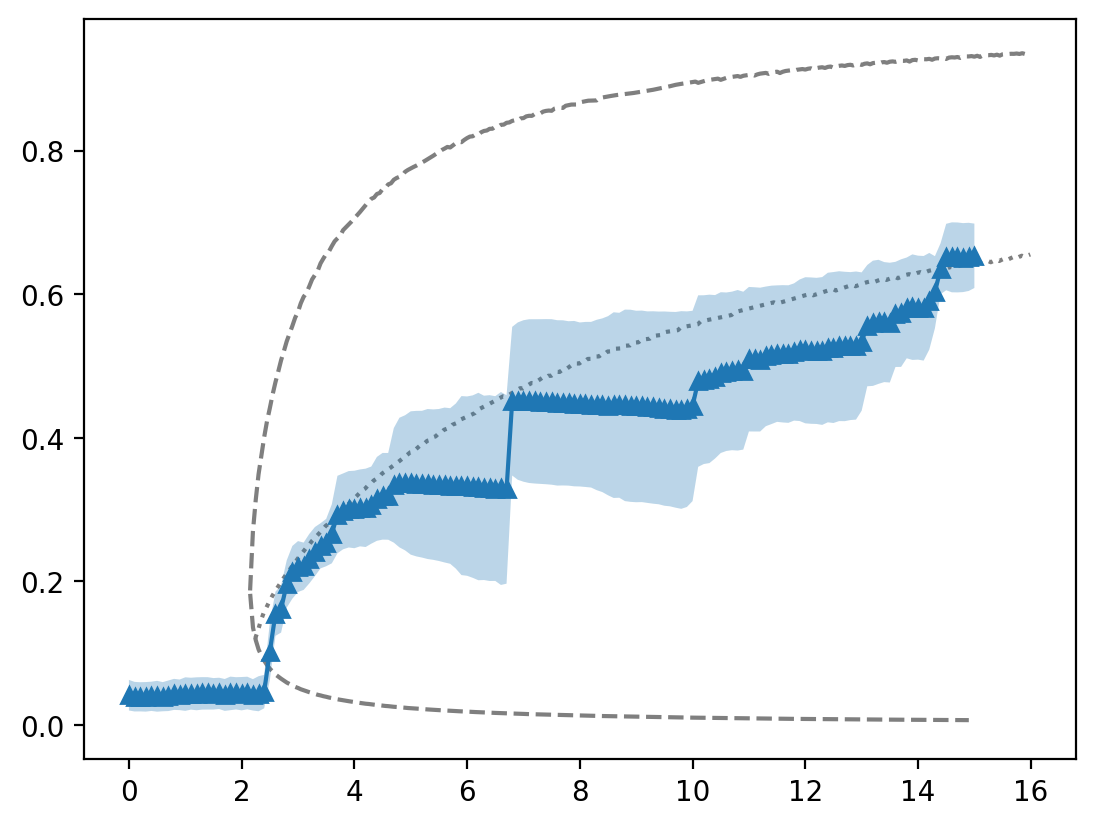

In [103]:
r__ = df.unstack().r.to_numpy(dtype=float).T[0]
r_std = df.unstack().rstd.to_numpy(dtype=float).T[0]
plt.fill_between(Ks,r__-r_std,r__+r_std,alpha=0.3)
plt.plot(Ks,r__,'^-')
F_, = plt.plot(*KR_underK(F_new,16),':',color ='tab:gray',zorder=0)
B_, = plt.plot(*KR_underK(BU,16),linestyle='--',color = 'tab:gray',zorder=0)
plt.plot(*KR_underK(BO,16),linestyle='--',color = 'tab:gray',zorder=0)


ms = df.reset_index().m.unique()
re_df = df.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
p_F, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
p_B, = plt.plot([0],  marker='None',
        linestyle='None', label='dummy-empty')

leg3 = plt.legend([p_F,(lf,mf,ff),F_, p_B, (l,m,f), B_],
                    [r'Foward ($K\uparrow$)'] + categories + [r'Backward ($K\downarrow$)'] + categories,
                    loc = 4,ncol=2)
leg_c = plt.legend([p0,p1,p2,p3,p4,p5,p6],[0]+K_backs,loc=5,title=r'Initial $K$')

In [47]:
split = lambda x: np.array(x.split(' '),dtype=float)
df_dtheta = split(df.loc[(6,6)]['avg_dtheta'])

Text(0, 0.5, 'avg. angular velocity')

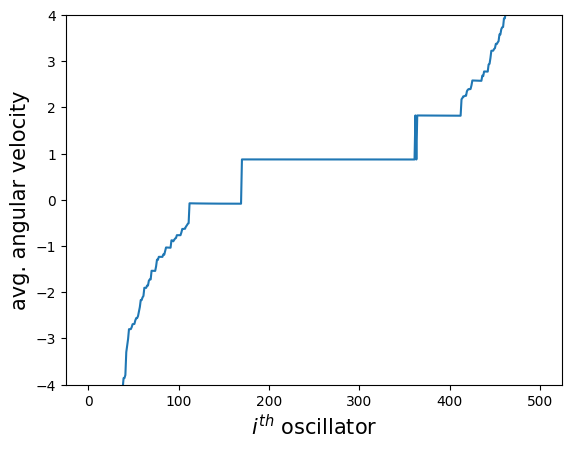

In [48]:
plt.plot(df_dtheta)
plt.ylim(-4,4)
plt.xlabel(r'$i^{th}$ oscillator',fontsize=15)
plt.ylabel(r'avg. angular velocity',fontsize=15)

NameError: name 'df_b_dick' is not defined

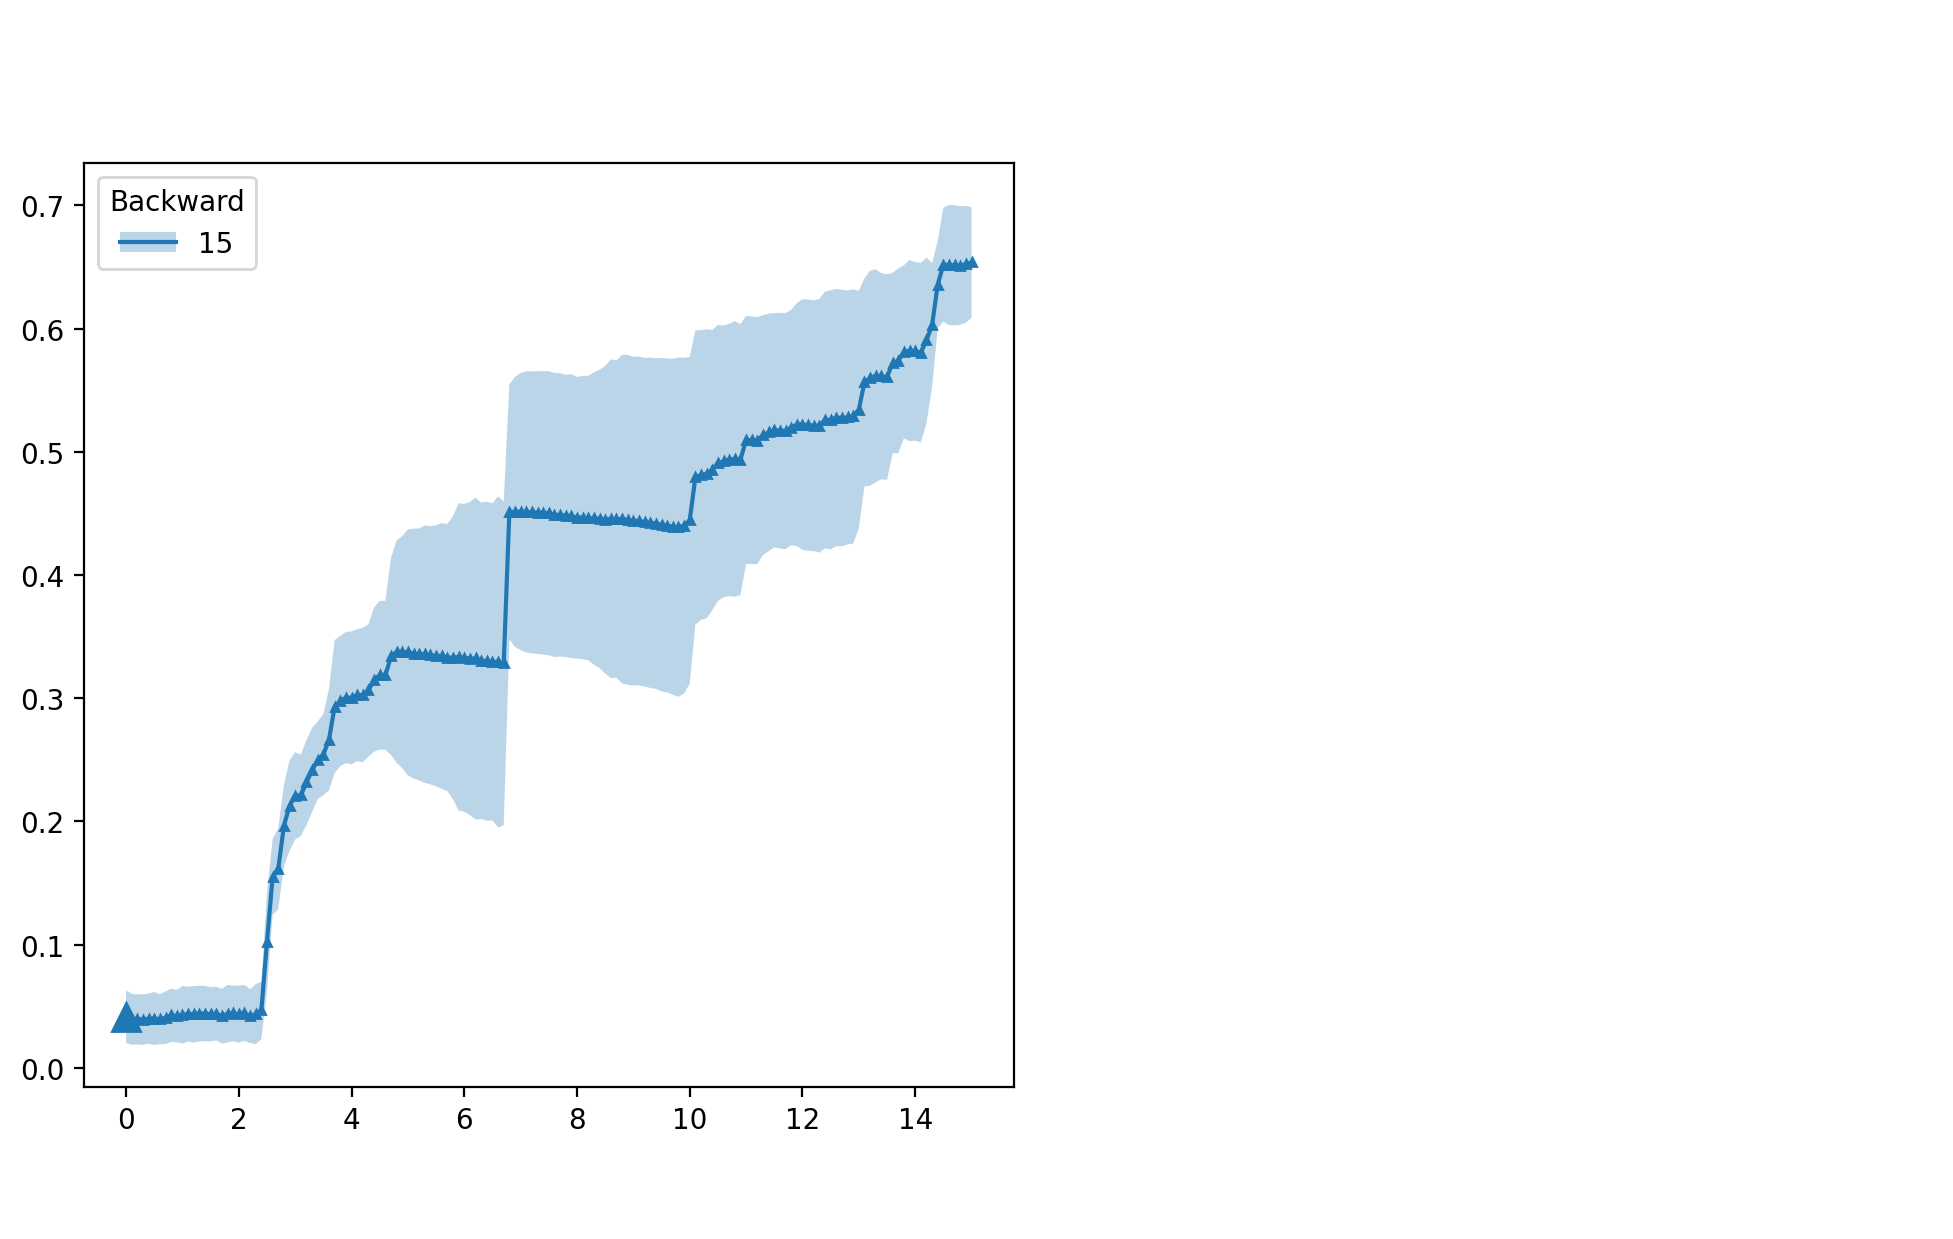

In [152]:
fig = plt.figure(figsize=(10,6))
fig_r,fig_s = fig.subfigures(1,2,wspace=1,width_ratios=[6,4])
ax = fig_r.subplots(1)


ms = df.reset_index().m.unique()
re_df = df.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy(dtype=float)
rs = df_m.r.to_numpy(dtype=float)
rstd = df_m.rstd.to_numpy(dtype=float)
rMM= df_m.rMM.to_numpy(dtype=float)
plt.sca(ax)
lf,= plt.plot(Ks,rs,'-',label=r'$K_{forward}$',color = 'tab:blue')
_,= plt.plot(Ks[0],rs[0],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=10,zorder=10)
mf,= plt.plot(Ks[:],rs[:],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=3)
ff = plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3)
plt.legend([(lf,ff)],K_backs,title=f'Backward')

backs_r = []
backs_K = []
num = len(df_b_dick)+1
num_c = 1
B_legends = []
B_legends2 = ()
for K_back,df_b in df_b_dick.items():

    ms = df_b.reset_index().m.unique()
    re_df = df_b.reset_index()

    df_m = re_df[re_df.m == m_to_draw]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    backs_K.append(Ks[-1])
    backs_r.append(rs[-1])
    rstd = df_m.rstd.to_numpy()
    rMM= df_m.rMM.to_numpy()
    plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.2)   
    l,=plt.plot(Ks,rs,'-',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}')
    m,=plt.plot(Ks[:],rs[:],'v',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=3)
    _,=plt.plot(Ks[-1],rs[-1],'v',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=10)
    Ku,Ru = U_sets_op_B[K_back]
    if type(Ku)== float:
        plt.plot(Ku,Ru,':',color = tab_color_list[num_c],zorder= num)
    else: 
        Ku_ = Ku[Ku<K_back+1] 
        Ru_ = Ru[Ku<K_back+1] 
        plt.plot(Ku_,Ru_,linestyle='--',color = tab_color_list[num_c],zorder= num)
    f=plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3,zorder= num)
    num -=1
    num_c +=1
    B_element = (l,m,f)
    B_label = K_back
    B_legends.append(B_element)
ax = plt.gca()
plt.legend(B_legends,K_backs,title=f'Backward')#,handler_map={tuple: HandlerTuple(ndivide=None)})



p0, = plt.plot(np.nan,np.nan,'^',color=tab_color_list[0])
p1, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[1])
p2, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[2])
p3, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[3])
p4, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[4])
p5, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[5])
p6, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[6])

string = ', '.join(map(str,K_backs))
ax =plt.gca()

plt.xlim(0,16)
plt.ylim(0,1)
p_F, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
p_B, = plt.plot([0],  marker='None',
        linestyle='None', label='dummy-empty')
categories = ['Theoretical', 'Simulated']

F_, = plt.plot(*KR_underK(F_new,16),':',color ='tab:gray',zorder=0)
B_, = plt.plot(*KR_underK(BU,16),linestyle='--',color = 'tab:gray',zorder=0)
plt.plot(*KR_underK(BO,16),linestyle='--',color = 'tab:gray',zorder=0)
leg3 = plt.legend([p_F,(lf,mf,ff),F_, p_B, (l,m,f), B_],
                    [r'Foward ($K\uparrow$)'] + categories + [r'Backward ($K\downarrow$)'] + categories,
                    loc = 4,ncol=2)
leg_c = plt.legend([p0,p1,p2,p3,p4,p5,p6],[0]+K_backs,loc=5,title=r'Initial $K$')


ax.add_artist(leg3)
plt.title(f'$m$ = {m_to_draw:.01f}, $dK$=0.1, $N$=500',fontsize=15)
# plt.suptitle(r'$K$ vs $r$', fontsize =18,y=0.95)
plt.ylabel(r'order parameter : $r$')
plt.xlabel(r'Coupling constant : $K$')
# plt.tight_layout()



ms = df.reset_index().m.unique()
re_df = df.reset_index()

axs = fig_s.subplots(3,1,height_ratios=[4,1,1],sharex=True)

markers = ['^']+['v']*len(K_backs)
# markers = ['.']+[',']*len(K_backs)
TO_DRAW = ['main_s','p_s_0','m_s_0']
TEXT = ['main cluster',r'secondary cluster $(+)$',r'secondary cluster $(-)$']
for to_d, ax,text in zip(TO_DRAW,axs,TEXT):
    num = 0
    num_c = 0
    plt.sca(ax)
    for i,(K_back,df_b) in enumerate(list(df_new_dict.items())):

        ms = df_b.reset_index().m.unique()
        re_df = df_b.reset_index()

        df_m = re_df[re_df.m == m_to_draw]
        Ks = df_m.K.to_numpy()
        rs = df_m[to_d].to_numpy()/N
        rstd = df_m.rstd.to_numpy()
        rMM= df_m.rMM.to_numpy()
        plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.2)   
        l,=plt.plot(Ks,rs,'-',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}')
        m,=plt.plot(Ks[::1],rs[::1],markers[i],color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=3)
        _,=plt.plot(Ks[-1],rs[-1],markers[i],color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=6)
        num +=1
        num_c +=1
        B_element = (l,m,f)
        B_label = K_back
        B_legends.append(B_element)
        min_,_ = plt.gca().get_ylim()
    print(min_)
    plt.text(16-0.1,min_,text,horizontalalignment='right',verticalalignment='bottom')
# ax = plt.gca()

axs[0].set_ylim(0.3382,1)
ax =plt.gca()
# plt.ylim(0,1)
plt.xlim(0,16)



# plt.title(f'$m$ = {m_to_draw:.01f}, $dK$=0.1, $N$=500',fontsize=15)
# plt.suptitle(r'$K$ vs $r$', fontsize =18,y=0.95)
fig_s.supylabel(r'relative cluster size',x=0)
fig_s.supxlabel(r'$K$')
# fig.tight_layout()


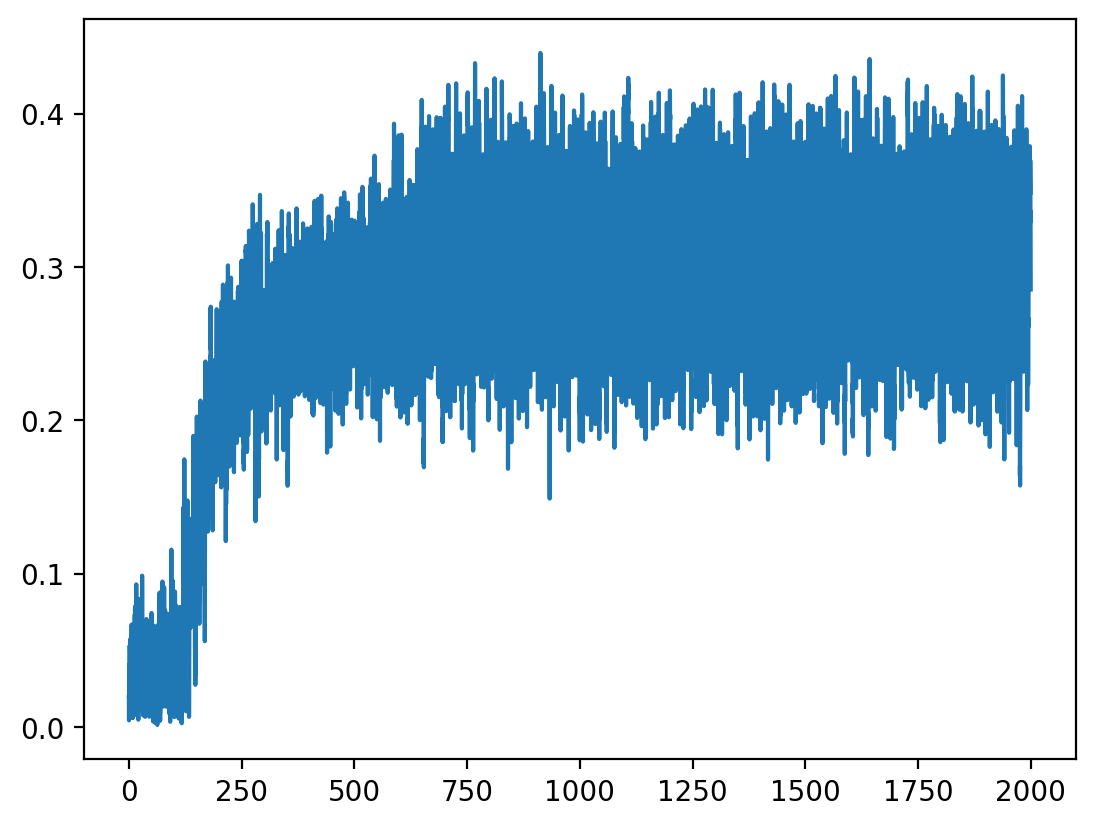

In [62]:
plt.plot(t,rs)

In [96]:
plt.figure(figsize=(6,4.5),dpi=500)
ms = df.reset_index().m.unique()
re_df = df.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()

lf,= plt.plot(Ks,rs,'-',label=r'$K_{forward}$',color = 'tab:blue')
_,= plt.plot(Ks[0],rs[0],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=10,zorder=10)
mf,= plt.plot(Ks[:],rs[:],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=3)
ff = plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3)
plt.legend([(lf,ff)],K_backs,title=f'Backward')

backs_r = []
backs_K = []
num = len(df_b_dick)+1
num_c = 1
B_legends = []
B_legends2 = ()
for K_back,df_b in df_b_dick.items():

    ms = df_b.reset_index().m.unique()
    re_df = df_b.reset_index()

    df_m = re_df[re_df.m == m_to_draw]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    backs_K.append(Ks[-1])
    backs_r.append(rs[-1])
    rstd = df_m.rstd.to_numpy()
    rMM= df_m.rMM.to_numpy()
    plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.2)   
    l,=plt.plot(Ks,rs,'-',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}')
    m,=plt.plot(Ks[:],rs[:],'v',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=3)
    _,=plt.plot(Ks[-1],rs[-1],'v',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=10)
    Ku,Ru = U_sets_op_n[K_back]
    if type(Ku)== float:
        plt.plot(Ku,Ru,':',color = tab_color_list[num_c],zorder= num)
    else: 
        Ku_ = Ku[Ku<K_back+1] 
        Ru_ = Ru[Ku<K_back+1] 
        plt.plot(Ku_,Ru_,linestyle='--',color = tab_color_list[num_c],zorder= num)
    f=plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3,zorder= num)
    num -=1
    num_c +=1
    B_element = (l,m,f)
    B_label = K_back
    B_legends.append(B_element)
ax = plt.gca()
plt.legend(B_legends,K_backs,title=f'Backward')#,handler_map={tuple: HandlerTuple(ndivide=None)})



p0, = plt.plot(np.nan,np.nan,'^',color=tab_color_list[0])
p1, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[1])
p2, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[2])
p3, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[3])
p4, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[4])
p5, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[5])
p6, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[6])

string = ', '.join(map(str,K_backs))
ax =plt.gca()

plt.xlim(0,16)
plt.ylim(0,1)
p_F, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
p_B, = plt.plot([0],  marker='None',
        linestyle='None', label='dummy-empty')
categories = ['Simulated','Theoretical']

F_, = plt.plot(*KR_underK(F_new,16),':',color ='tab:gray',zorder=0)
B_, = plt.plot(*KR_underK(BU,16),linestyle='--',color = 'tab:gray',zorder=0)
plt.plot(*KR_underK(BO,16),linestyle='--',color = 'tab:gray',zorder=0)
leg3 = plt.legend([p_F,(lf,mf,ff),F_, p_B, (l,m,f), B_],
                    [r'Foward ($K\uparrow$)'] + categories + [r'Backward ($K\downarrow$)'] + categories,
                    loc = 4,ncol=2)
leg_c = plt.legend([p0,p1,p2,p3,p4,p5,p6],[0]+K_backs,loc=5,title=r'Initial $K$')


ax.add_artist(leg3)
plt.title(f'$m$ = {m_to_draw:.01f}, $dK$=0.1, $N$=500',fontsize=15)
# plt.suptitle(r'$K$ vs $r$', fontsize =18,y=0.95)
plt.ylabel(r'$\langle$$r$$\rangle$$_t$',fontsize=13)
plt.xlabel(r'$K$',fontsize=13)
plt.tight_layout()


NameError: name 'm_to_draw' is not defined

<Figure size 3000x2250 with 0 Axes>

(-5.0, 5.0)

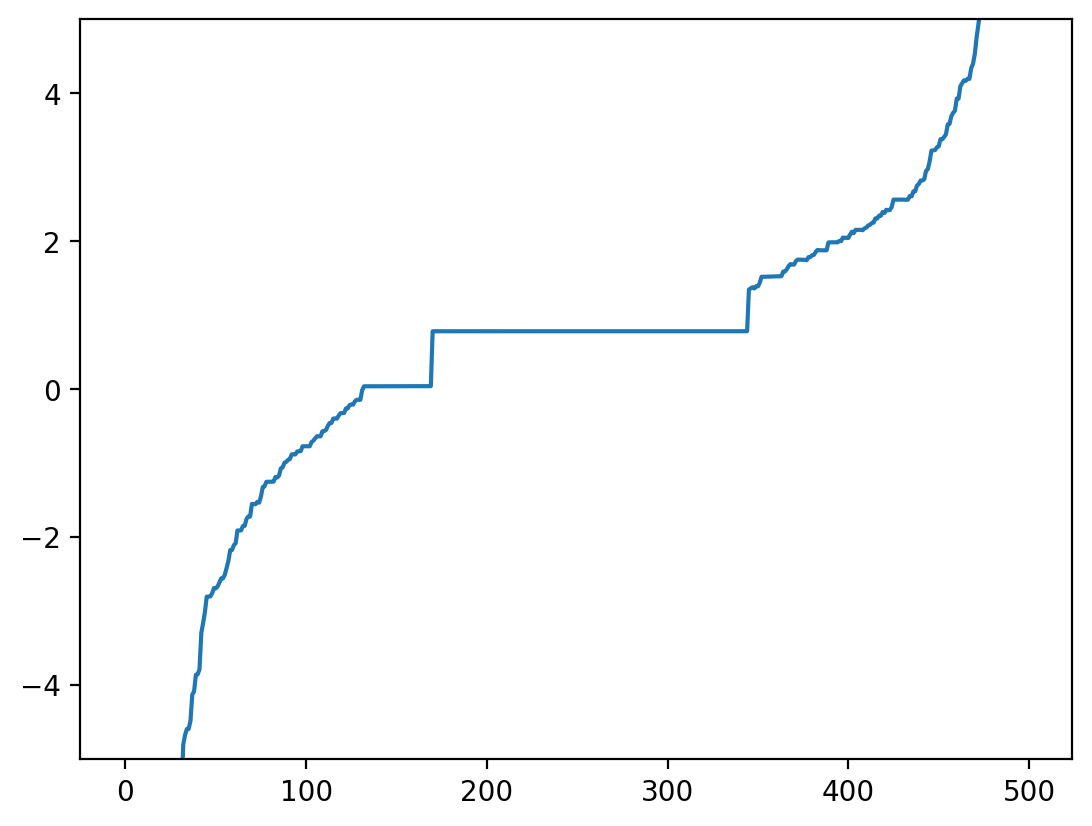

In [95]:
plt.plot(avg_dtheta[-1])
plt.ylim(-5,5)

In [37]:
print(*df.columns)

r rmin rmax rstd rMM error c0 c1 c2 c3 c4 c5 c6 c7 c8 c9 c0 phase vel c1 phase vel c2 phase vel c3 phase vel c4 phase vel c5 phase vel c6 phase vel c7 phase vel c8 phase vel c9 phase vel c0 omega c1 omega c2 omega c3 omega c4 omega c5 omega c6 omega c7 omega c8 omega c9 omega c0 list c1 list c2 list c3 list c4 list c5 list c6 list c7 list c8 list c9 list theta000 theta001 theta002 theta003 theta004 theta005 theta006 theta007 theta008 theta009 theta010 theta011 theta012 theta013 theta014 theta015 theta016 theta017 theta018 theta019 theta020 theta021 theta022 theta023 theta024 theta025 theta026 theta027 theta028 theta029 theta030 theta031 theta032 theta033 theta034 theta035 theta036 theta037 theta038 theta039 theta040 theta041 theta042 theta043 theta044 theta045 theta046 theta047 theta048 theta049 theta050 theta051 theta052 theta053 theta054 theta055 theta056 theta057 theta058 theta059 theta060 theta061 theta062 theta063 theta064 theta065 theta066 theta067 theta068 theta069 theta070 thet